__Note__: Thank you for your interest in my book [Data Science Projects with Python: A case study approach to successful data science projects using Python, pandas, and scikit-learn](https://www.amazon.com/gp/product/1838551026)! This git repo contains all the code referenced in the book. I will periodically update it to make sure it runs with the latest versions of the necessary software. Code cells that are updated from the published text will be noted in comments.

Please see the next cell for the latest versions that are confirmed to work.

Stephen Klosterman

May, 2020

In [1]:
# Load packages and check versions
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn

print('The Python version is {}.\n'.format(sys.version))
print('The Numpy version is {}.\n'.format(np.__version__))
print('The Pandas version is {}.\n'.format(pd.__version__))
print('The Matplotlib version is {}.\n'.format(mpl.__version__))
print('The Scikit-Learn version is {}.\n'.format(sklearn.__version__))
# The Python version is 3.7.6 (default, Jan  8 2020, 13:42:34) 
# [Clang 4.0.1 (tags/RELEASE_401/final)].

# The Numpy version is 1.18.1.

# The Pandas version is 1.0.1.

# The Matplotlib version is 3.1.3.

# The Scikit-Learn version is 0.22.1.

The Python version is 3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)].

The Numpy version is 1.18.1.

The Pandas version is 1.0.1.

The Matplotlib version is 3.1.3.

The Scikit-Learn version is 0.22.1.



In [2]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
import seaborn as sns #a fancy plotting package
mpl.rcParams['figure.dpi'] = 400 #high res figures

Load data

In [3]:
df = pd.read_csv('../../../Data/Chapter_1_cleaned_data.csv')

# Examining the Relationships between Features and the Response

In [4]:
features_response = df.columns.tolist()

In [5]:
features_response[:5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [6]:
features_response[-5:]

['graduate school', 'high school', 'none', 'others', 'university']

In [7]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

In [8]:
example_list_comp = [item for item in range(5)]
example_list_comp

[0, 1, 2, 3, 4]

In [9]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [10]:
corr = df[features_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


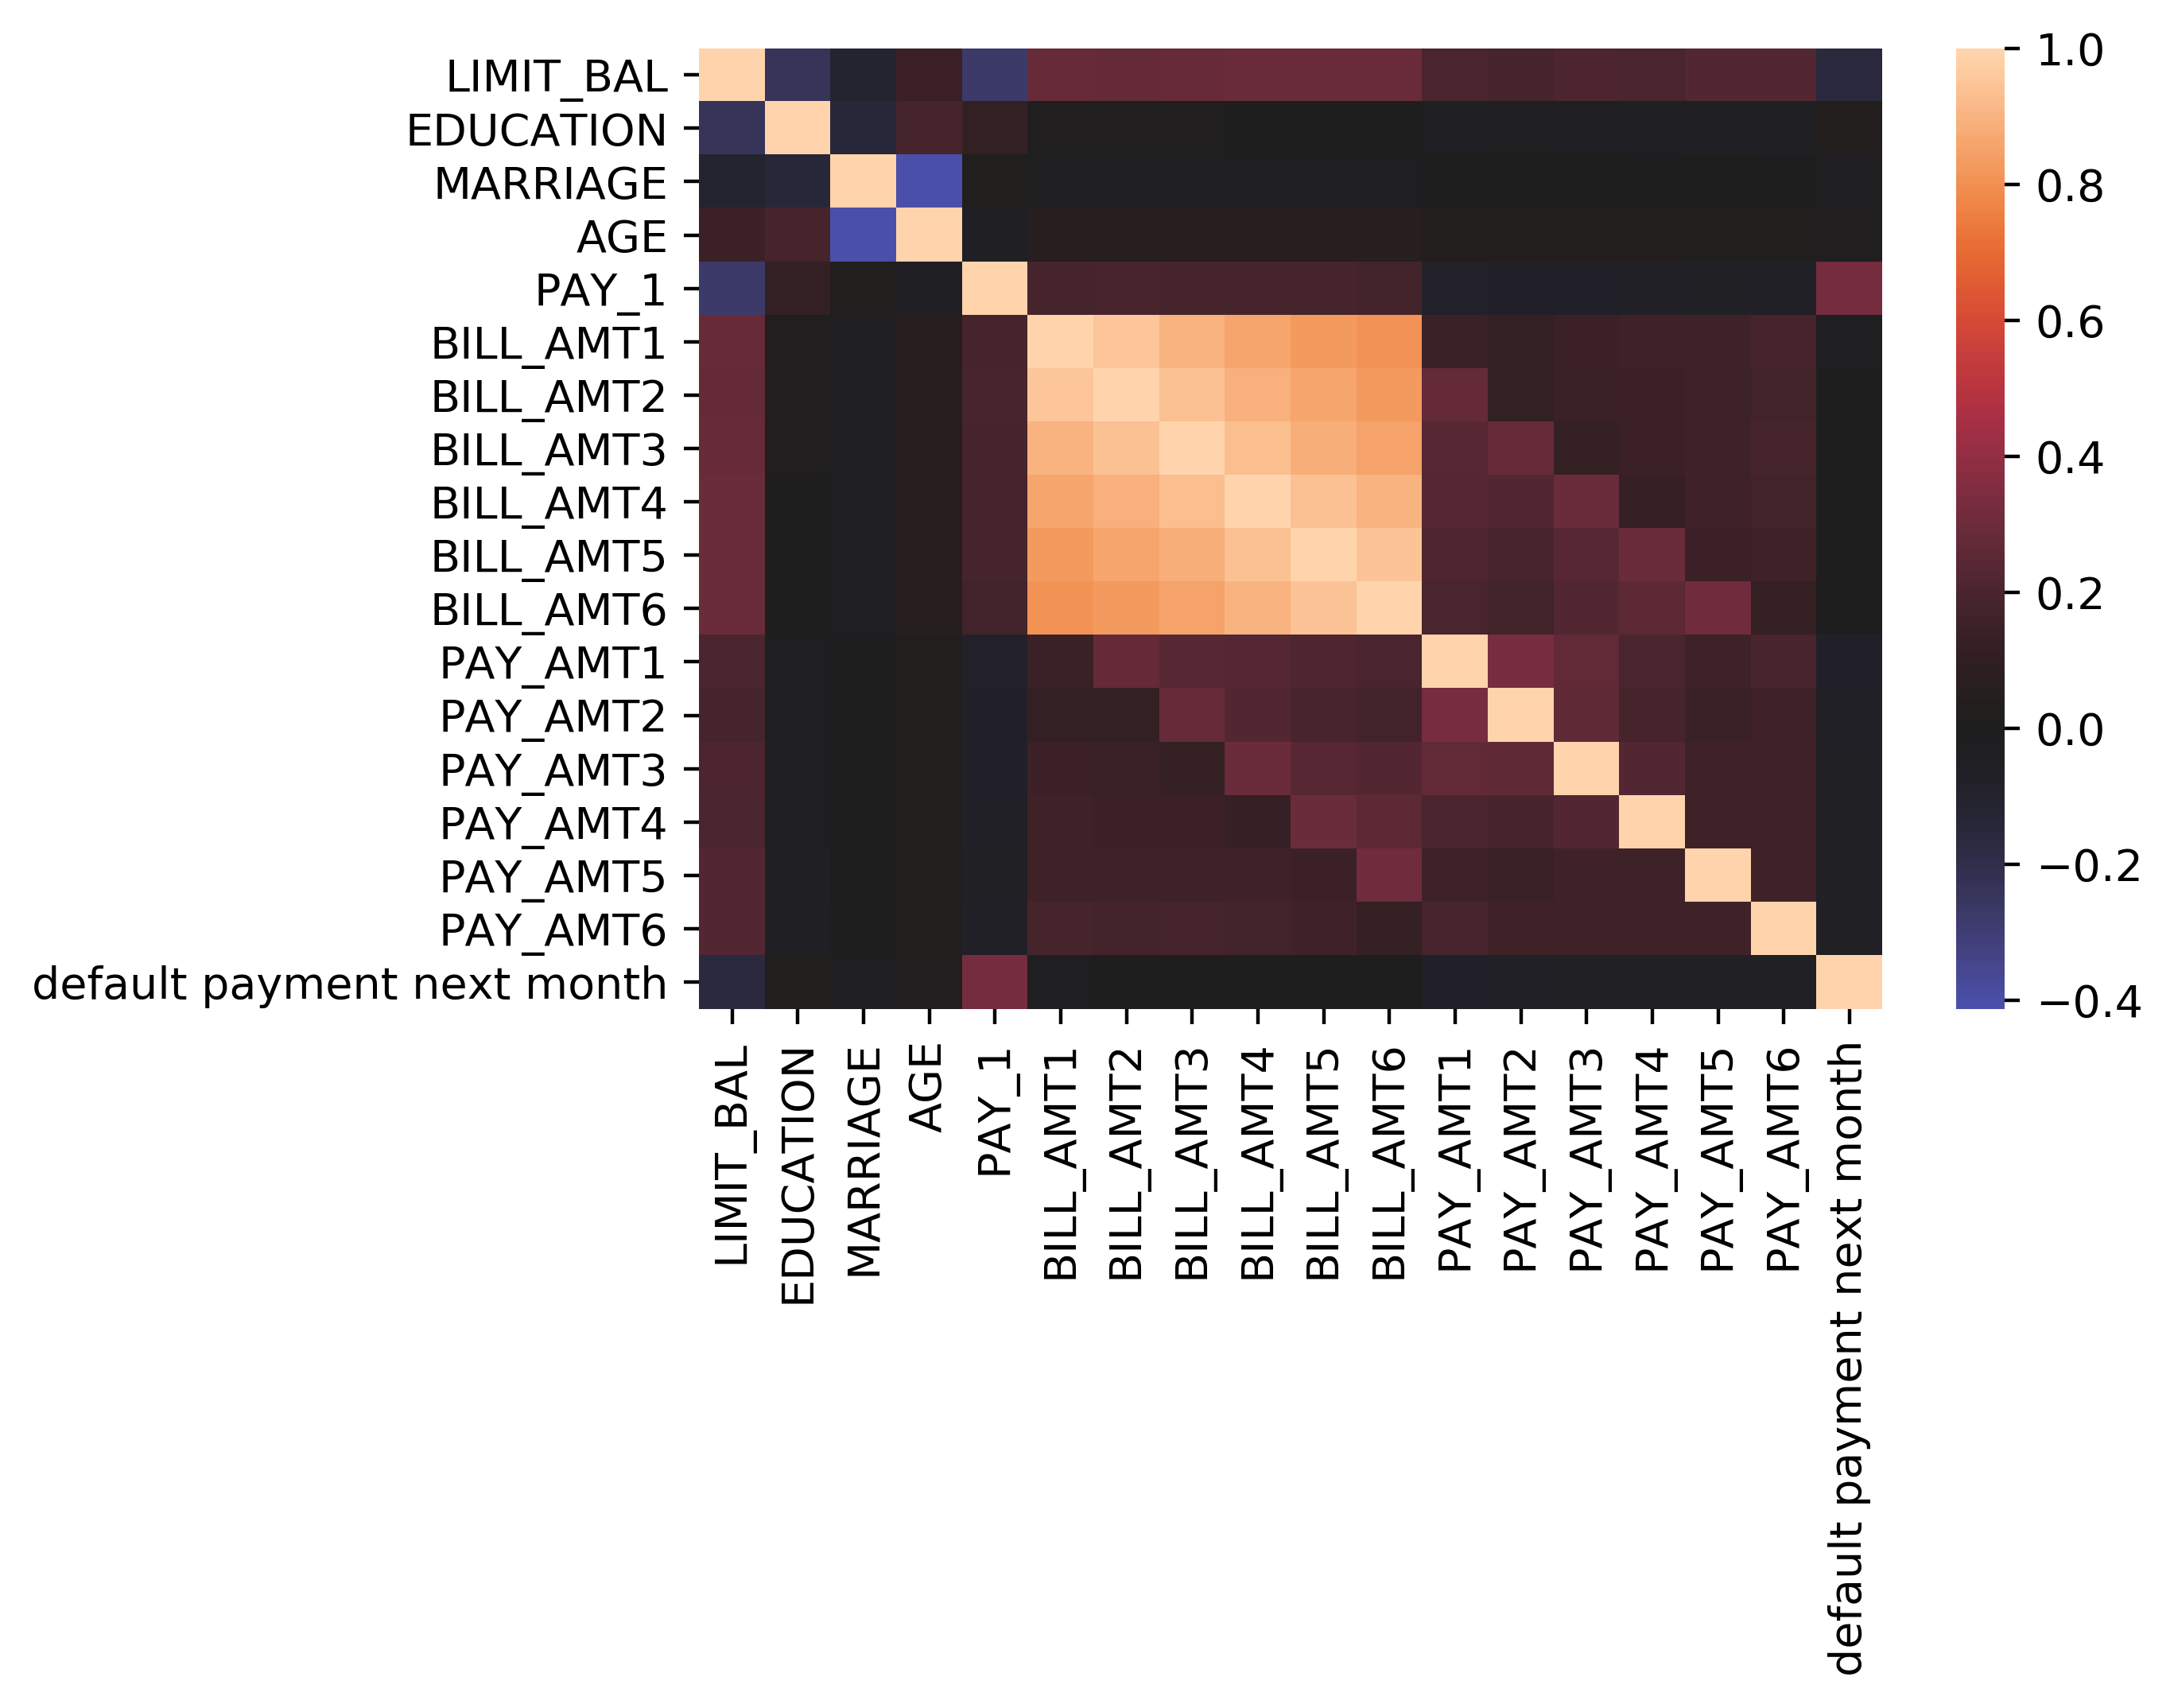

In [11]:
mpl.rcParams['figure.dpi'] = 400 #high res figures
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

In [12]:
n_points = 500
np.random.seed(seed=2)
X = np.random.uniform(low=0.0, high=10.0, size=(n_points,))
slope = 0.25
noise = 0.2
y=[]
y.append( slope * X + np.random.normal(loc=0.0, scale=noise, size=(n_points,)) )
y.append( -slope * X + np.random.normal(loc=0.0, scale=noise, size=(n_points,)) )
y.append( np.random.normal(loc=0.0, scale=noise, size=(n_points,)) )
y.append( np.sin(X/(2)*np.pi) + np.random.normal(loc=0.0, scale=noise, size=(n_points,)) )

In [13]:
np.corrcoef(X, y[3])

array([[1.        , 0.01900706],
       [0.01900706, 1.        ]])

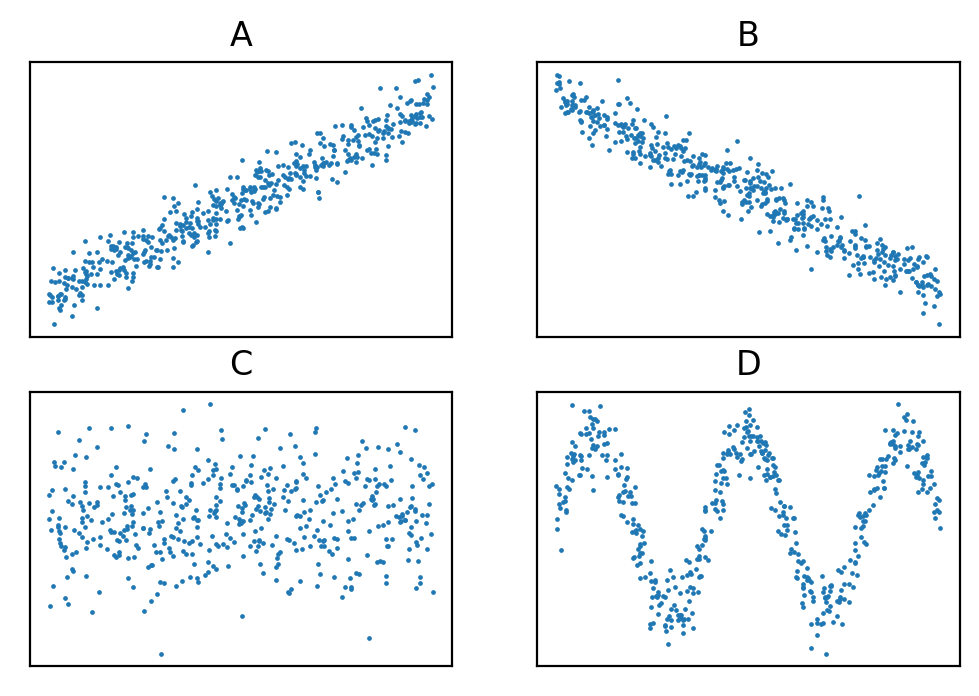

In [14]:
mpl.rcParams['figure.dpi'] = 200
fig_h, ax_h = plt.subplots(2,2)
counter = 0
correlations = []
titles = ['A', 'B', 'C', 'D']
for axis in ax_h.flatten():
    axis.scatter(X,y[counter],s=0.5)
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_title(titles[counter])
#     axis.set_title( r'$\rho = ${:0.2f}'.format(np.corrcoef(X, y[counter])[0,1]))
    correlations.append(np.corrcoef(X, y[counter])[0,1])
    counter+=1

In [15]:
correlations

[0.9637513276497903,
 -0.9659993956705684,
 0.06339625904219301,
 0.019007055545229253]

In [16]:
# df_sample = df[['LIMIT_BAL', 'PAY_1', 'default payment next month']]\
# .sample(frac=0.1, replace=False, random_state=1, axis=0)

#Hard to see much value in either of these:
# sns.pairplot(df_sample, hue='default payment next month')
# pd.scatter_matrix(df_sample)

# Exercise 11: F-test and Univariate Feature Selection

In [17]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 17) (26664,)


In [18]:
from sklearn.feature_selection import f_classif

In [19]:
[f_stat, f_p_value] = f_classif(X, y)

In [20]:
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
                          'F statistic':f_stat,
                          'p value':f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [21]:
from sklearn.feature_selection import SelectPercentile

In [22]:
selector = SelectPercentile(f_classif, percentile=20)

In [23]:
selector.fit(X, y)

SelectPercentile(percentile=20, score_func=<function f_classif at 0x1a1bbd2290>)

In [24]:
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [25]:
features = features_response[:-1]

In [26]:
best_features = [features[counter] for counter in range(len(features))
                 if best_feature_ix[counter]]

In [27]:
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

# Exercise 12: Visualizing the Relationship Between Features and Response

In [28]:
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [29]:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


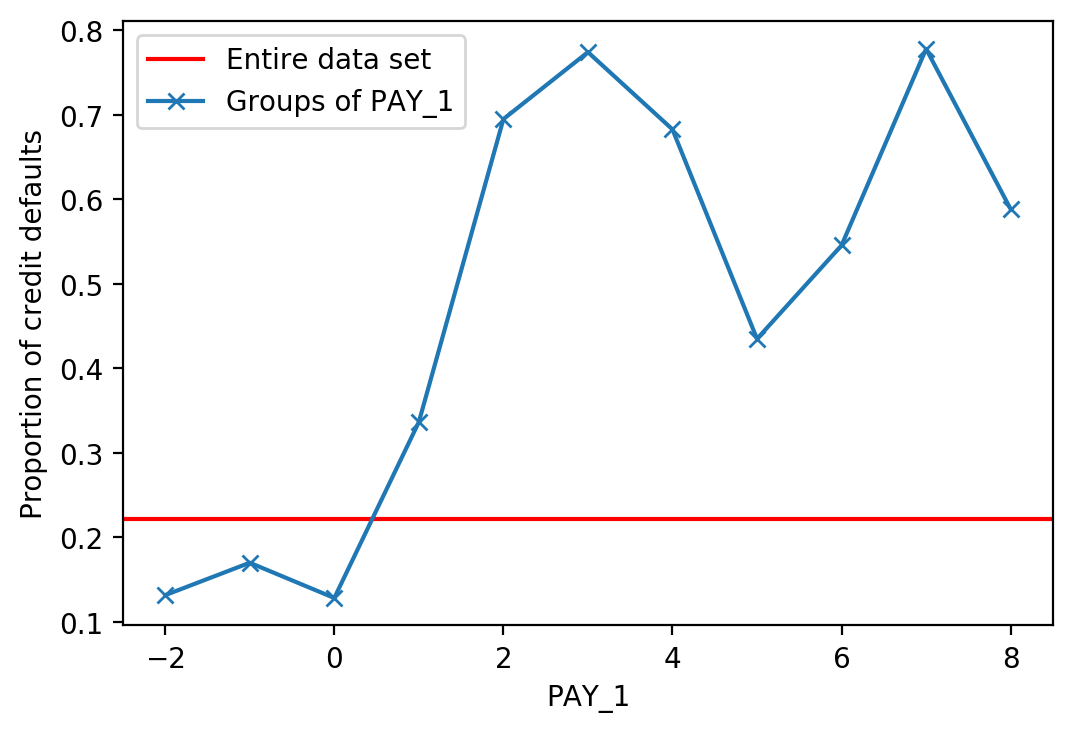

In [30]:
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire data set', 'Groups of PAY_1'])

In [31]:
pos_mask = y == 1
neg_mask = y == 0

Text(0.5, 1.0, 'Credit limits by response variable')

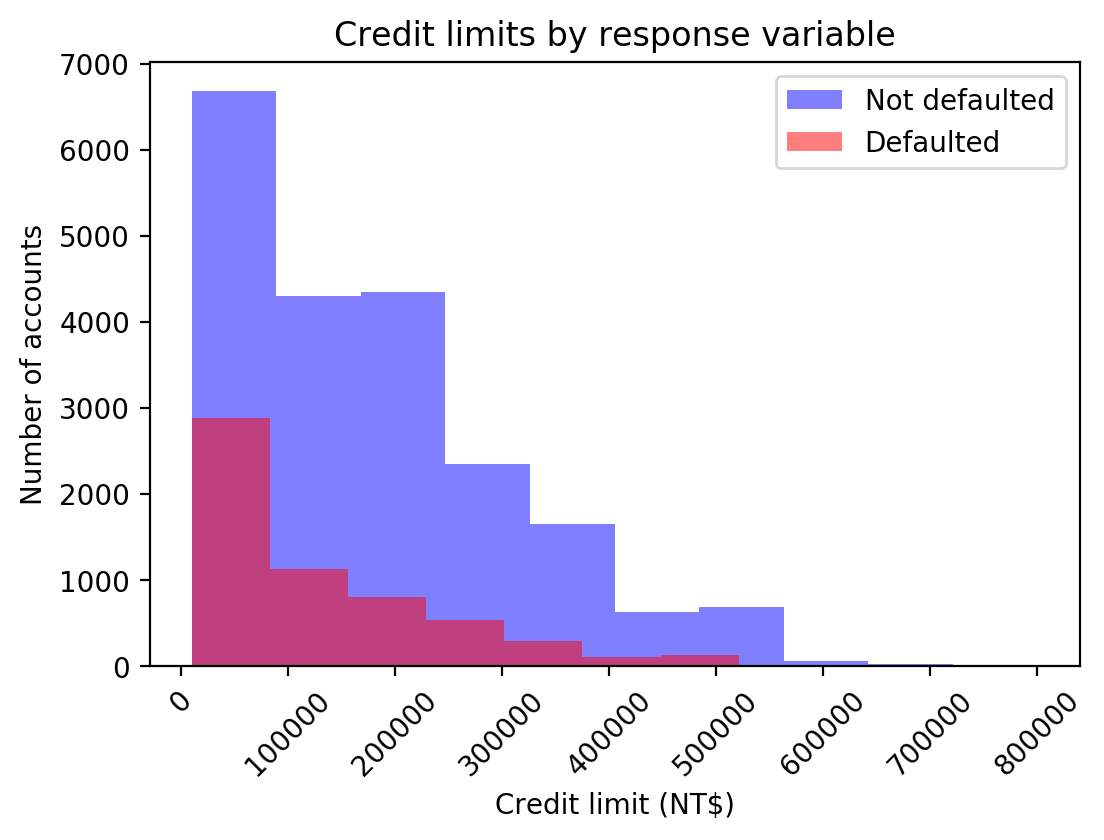

In [32]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], alpha=0.5, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha=0.5, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')

In [33]:
df['LIMIT_BAL'].max()

800000

In [34]:
bin_edges = list(range(0,850000,50000))
print(bin_edges[-1])

800000


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

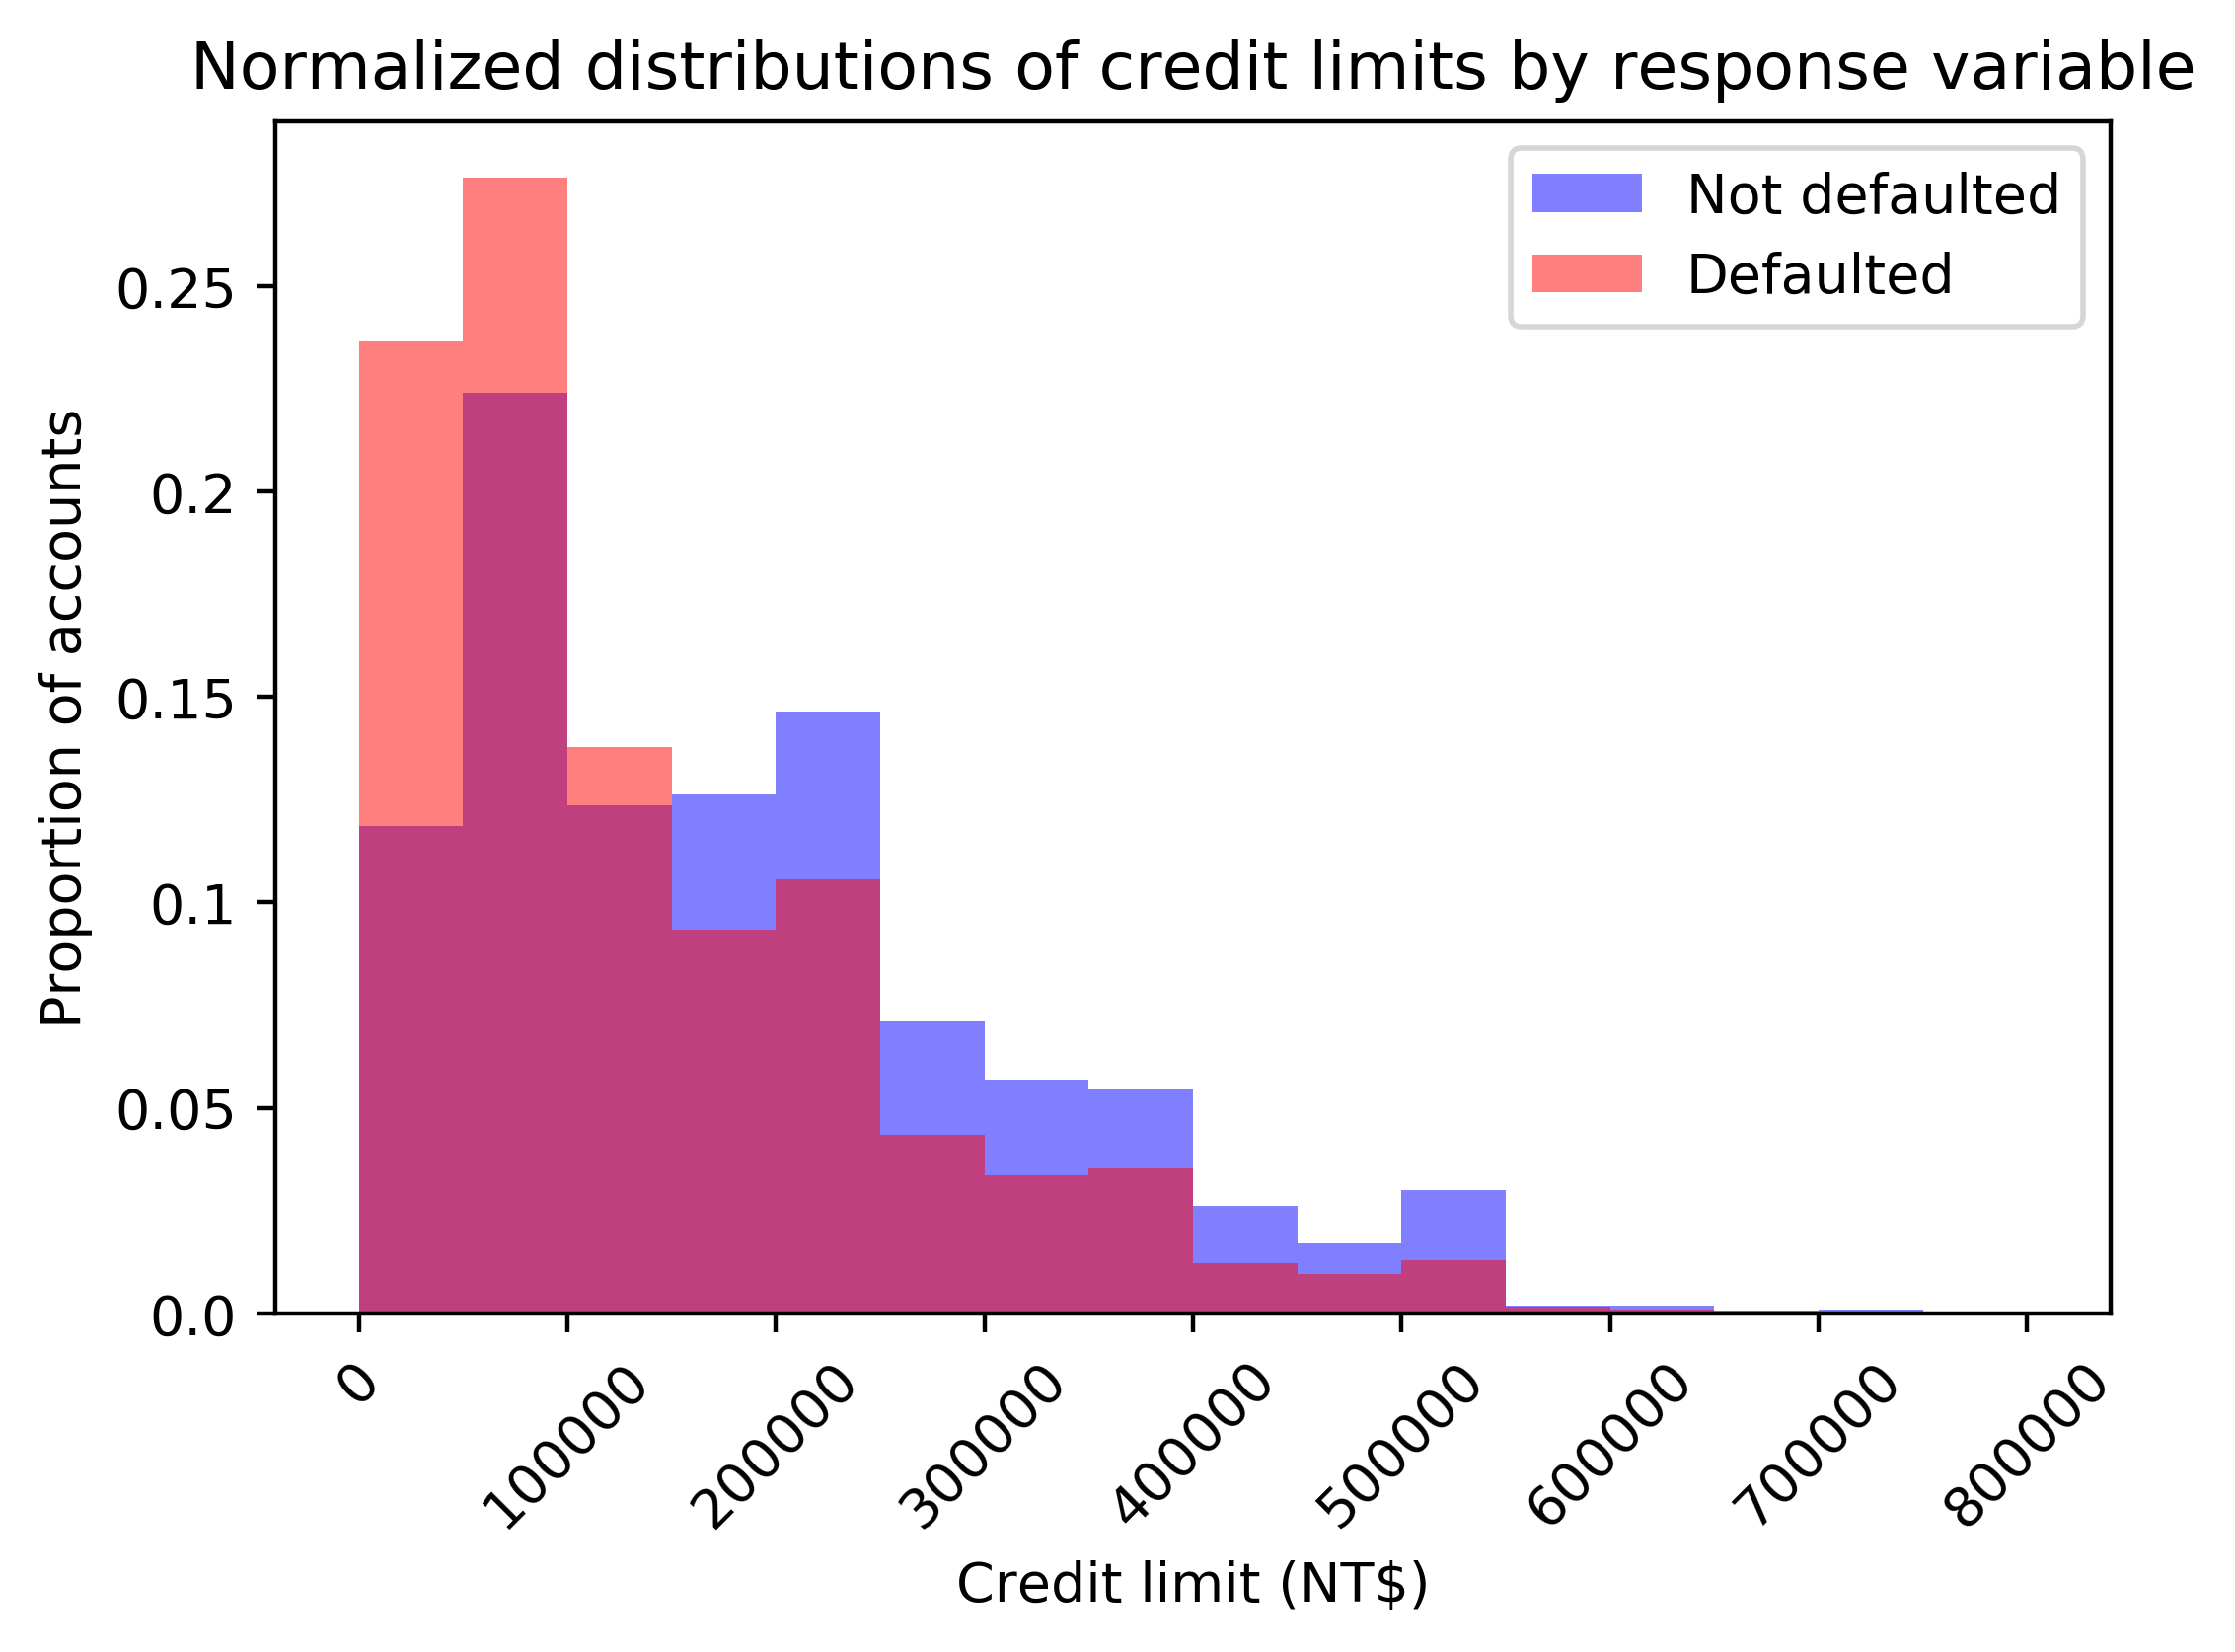

In [35]:
mpl.rcParams['figure.dpi'] = 400 
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable')

# Understanding Logistic Regression with `function` Syntax in Python and the Sigmoid Function

In [36]:
np.mean([1, 2, 3, 4, 5])

3.0

In [37]:
def my_mean(input_argument):
    output = sum(input_argument)/len(input_argument)
    return(output)

In [38]:
my_mean([1, 2, 3, 4, 5])

3.0

In [39]:
my_mean(input_argument=[1, 2, 3])

2.0

In [40]:
np.exp(1)

2.718281828459045

In [41]:
np.exp(0)

1.0

In [42]:
X_exp = np.linspace(-4,4,81)
print(X_exp[:5])
print(X_exp[-5:])

[-4.  -3.9 -3.8 -3.7 -3.6]
[3.6 3.7 3.8 3.9 4. ]


In [43]:
Y_exp = np.exp(X_exp)
Y_exp[:5]

array([0.01831564, 0.02024191, 0.02237077, 0.02472353, 0.02732372])

# Exercise 13: Plotting the Sigmoid Function

Text(0.5, 1.0, 'Plot of $e^X$')

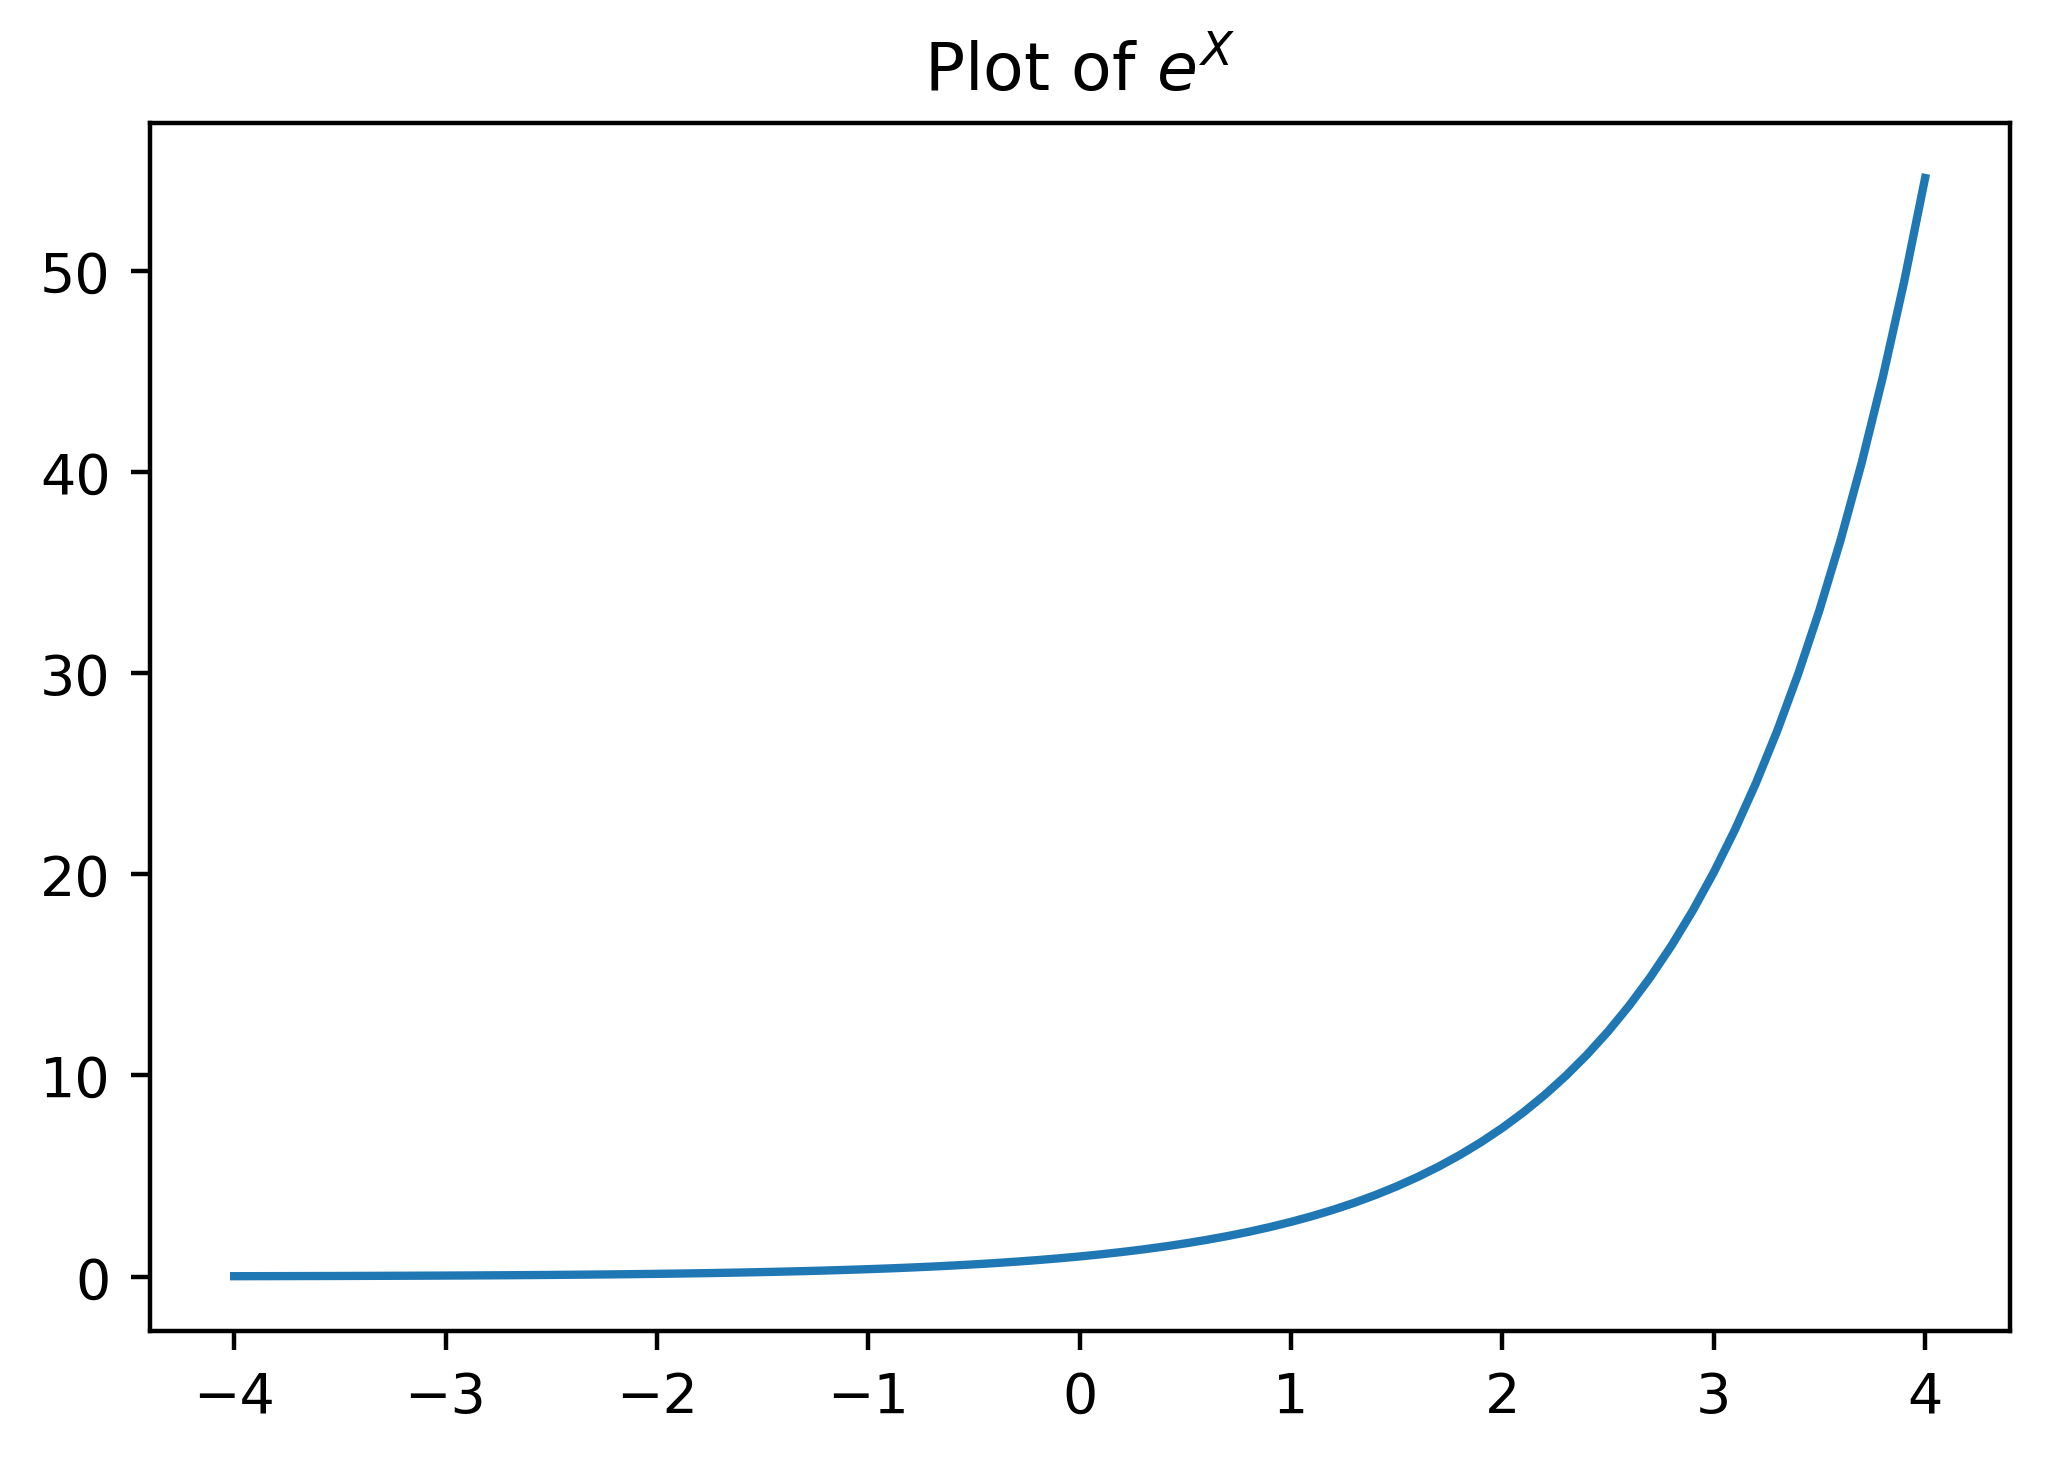

In [44]:
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^X$')

Text(0.5, 1.0, 'Plot of $e^{-X}$')

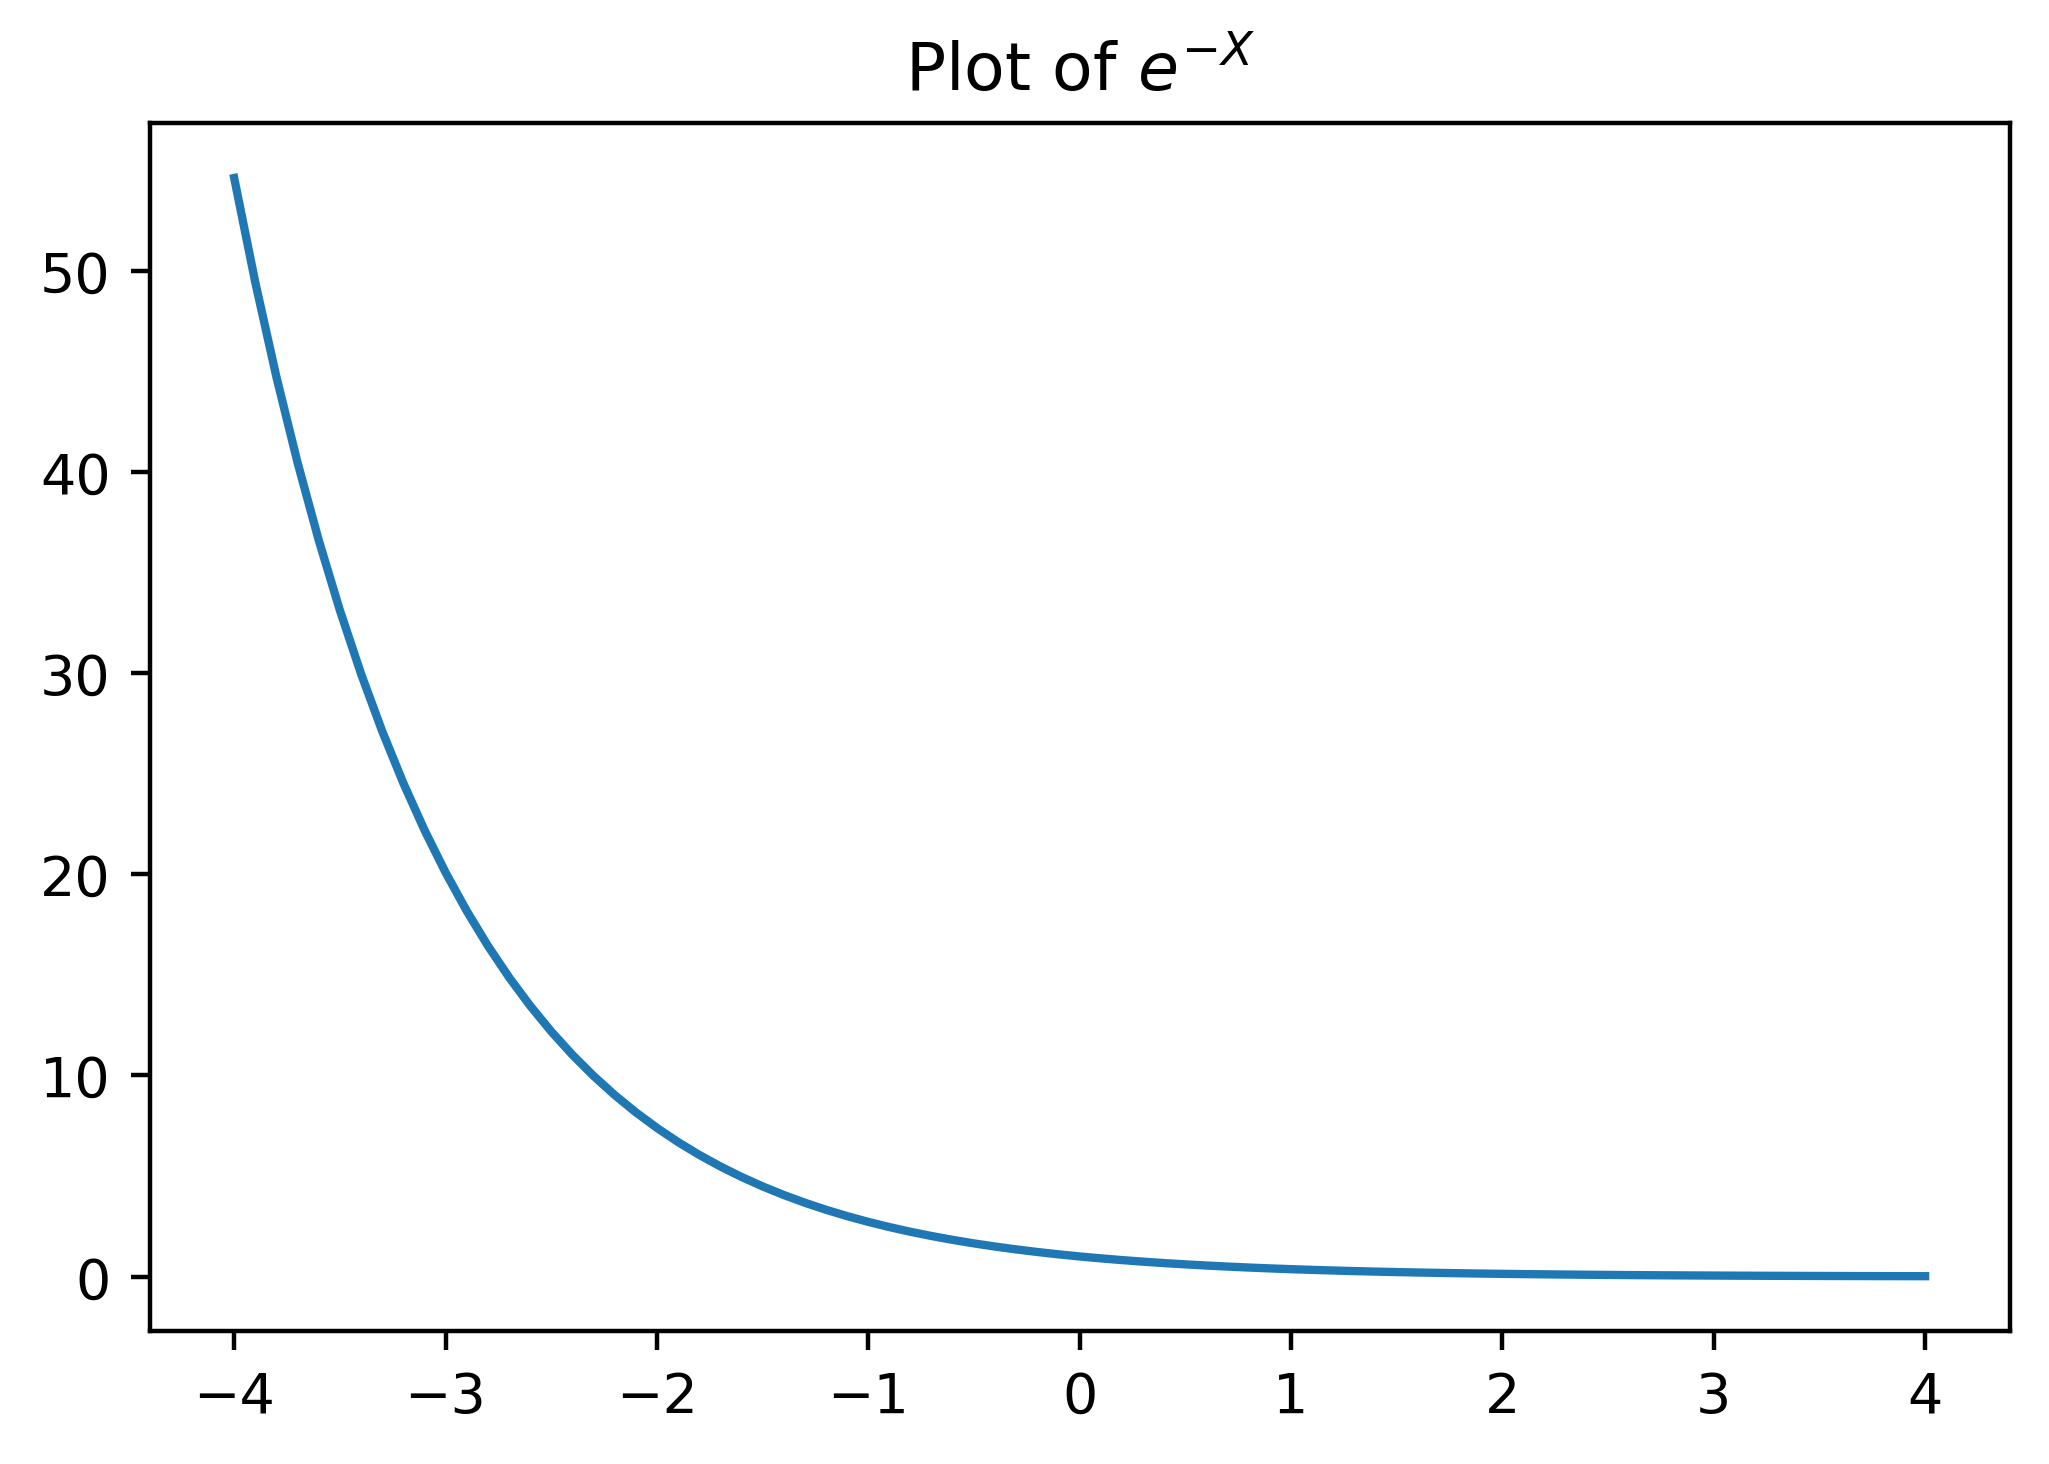

In [45]:
Y_exp = np.exp(-X_exp)
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^{-X}$')

In [46]:
def sigmoid(X):
    Y = 1 / (1 + np.exp(-X))
    return Y

Text(0.5, 1.0, 'The sigmoid function')

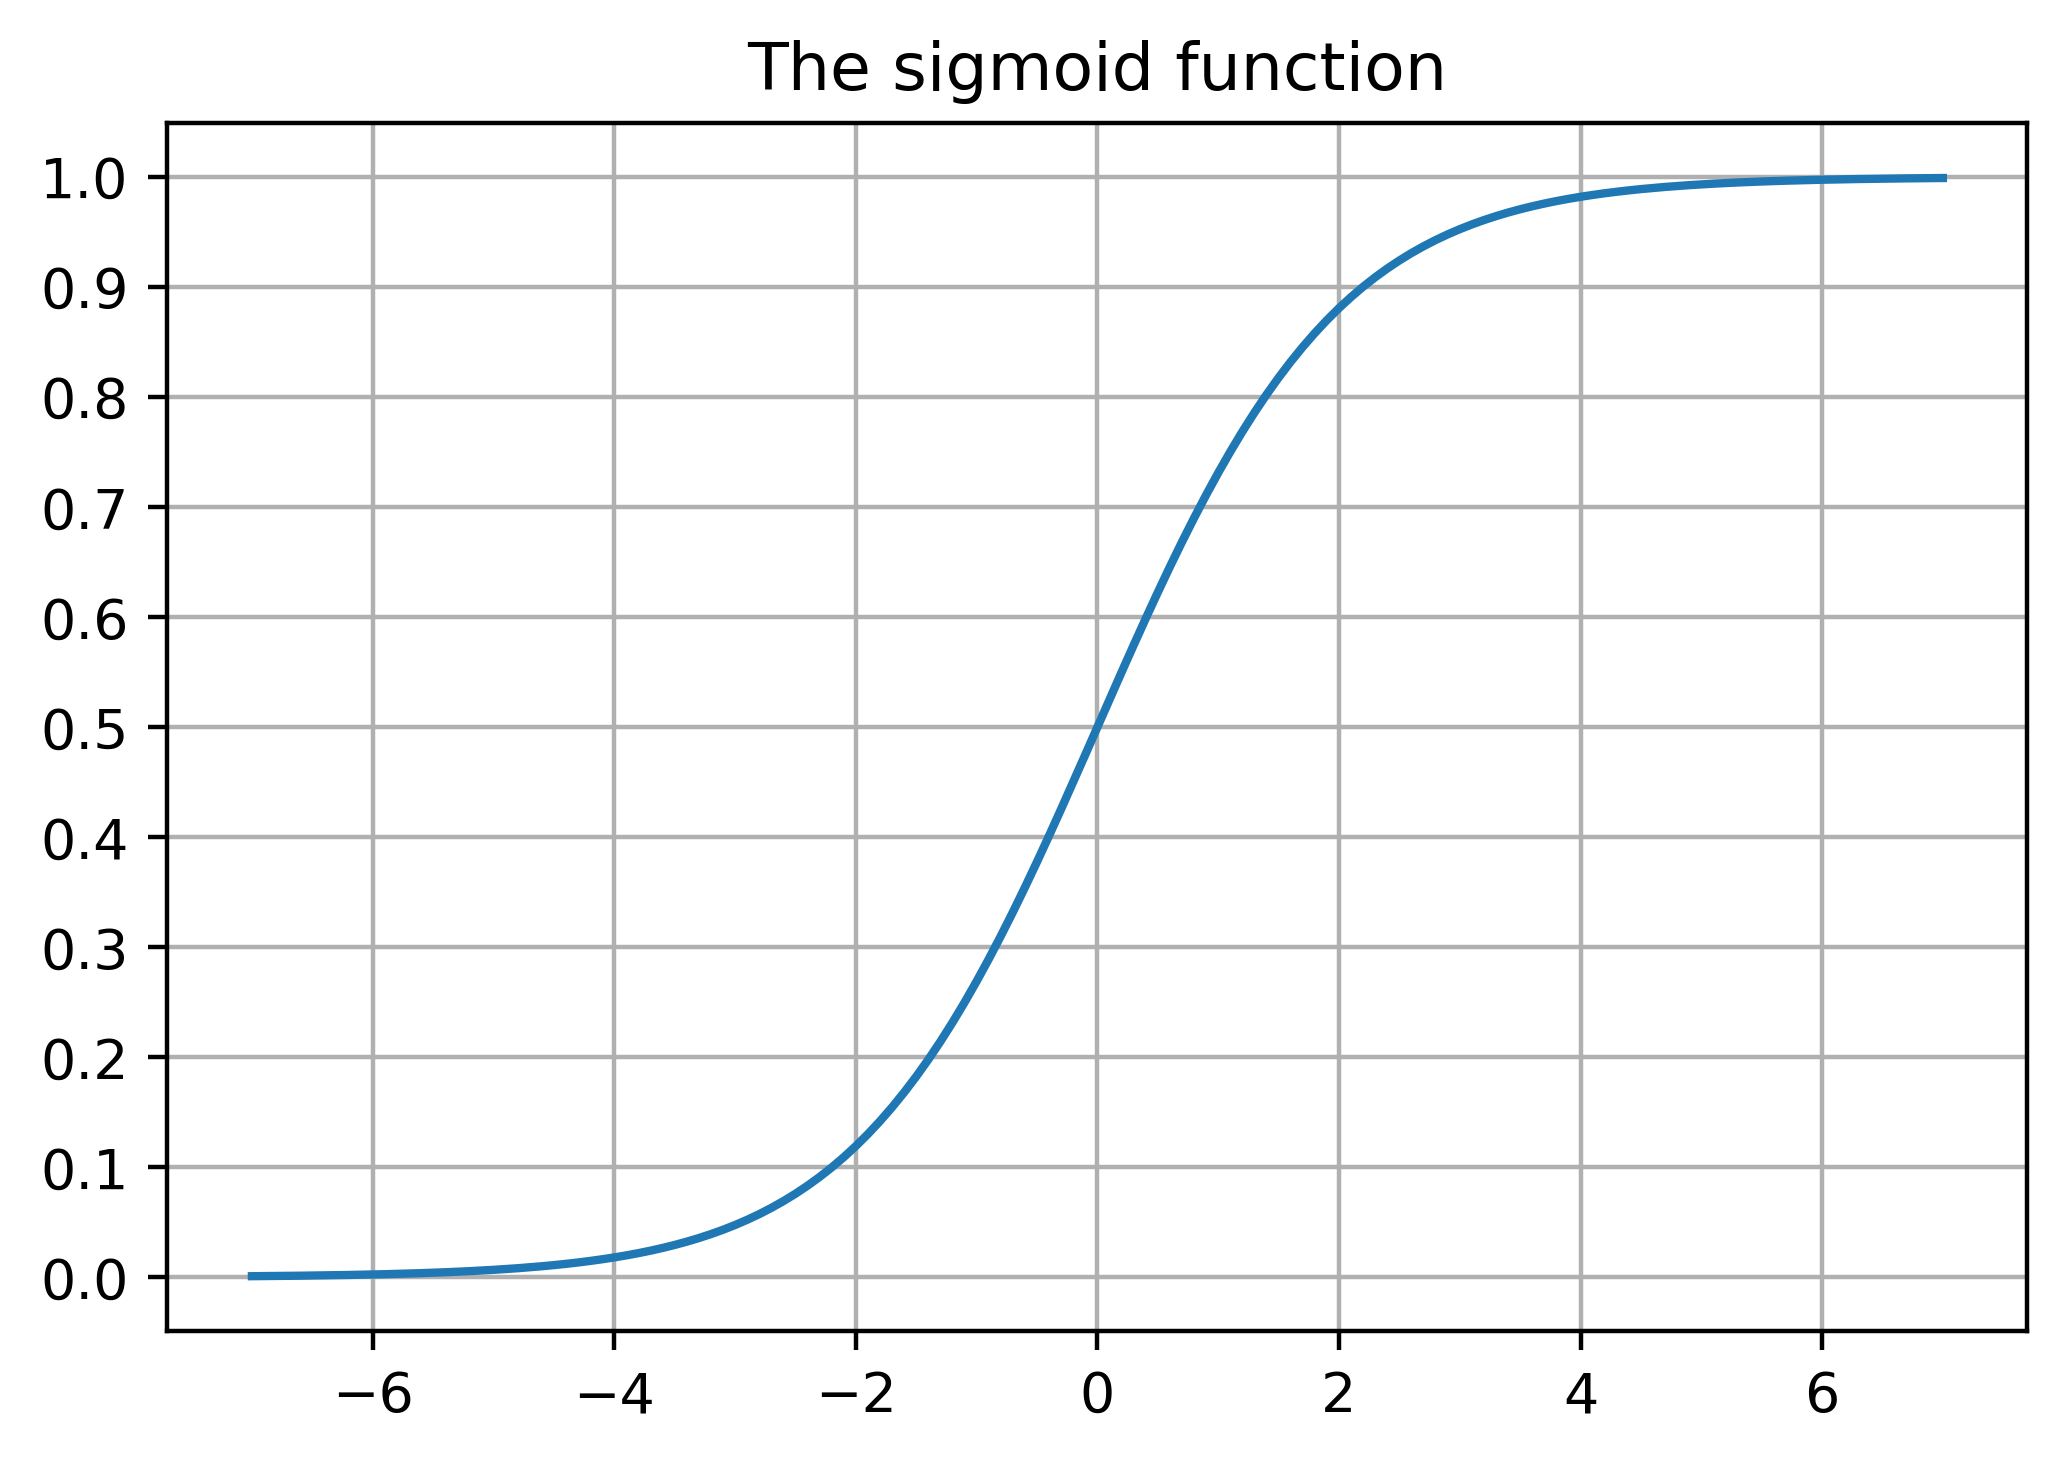

In [47]:
X_sig = np.linspace(-7,7,141)
Y_sig = sigmoid(X_sig)
plt.plot(X_sig,Y_sig)
plt.yticks(np.linspace(0,1,11))
plt.grid()
plt.title('The sigmoid function')

# Scope of Functions

In [48]:
Y

NameError: name 'Y' is not defined

In [49]:
example_global_variable = 1

In [50]:
def example_function():
    output = example_global_variable + 1
    return(output)

In [51]:
example_function()

2

# Exercise 14: Examining the Appropriateness of Features for Logistic Regression

In [52]:
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


In [53]:
p = group_by_pay_mean_y['default payment next month'].values
q = 1-p
print(p)
print(q)

[0.13166397 0.17000198 0.12829525 0.33639988 0.69470143 0.7739726
 0.68253968 0.43478261 0.54545455 0.77777778 0.58823529]
[0.86833603 0.82999802 0.87170475 0.66360012 0.30529857 0.2260274
 0.31746032 0.56521739 0.45454545 0.22222222 0.41176471]


In [54]:
odds_ratio = p/q
odds_ratio

array([0.15162791, 0.20482215, 0.14717742, 0.50693161, 2.27548209,
       3.42424242, 2.15      , 0.76923077, 1.2       , 3.5       ,
       1.42857143])

In [55]:
log_odds = np.log(odds_ratio)
log_odds

array([-1.88632574, -1.58561322, -1.91611649, -0.67937918,  0.82219194,
        1.23088026,  0.76546784, -0.26236426,  0.18232156,  1.25276297,
        0.35667494])

In [56]:
group_by_pay_mean_y.index

Int64Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='PAY_1')

Text(0.5, 0, 'Values of PAY_1')

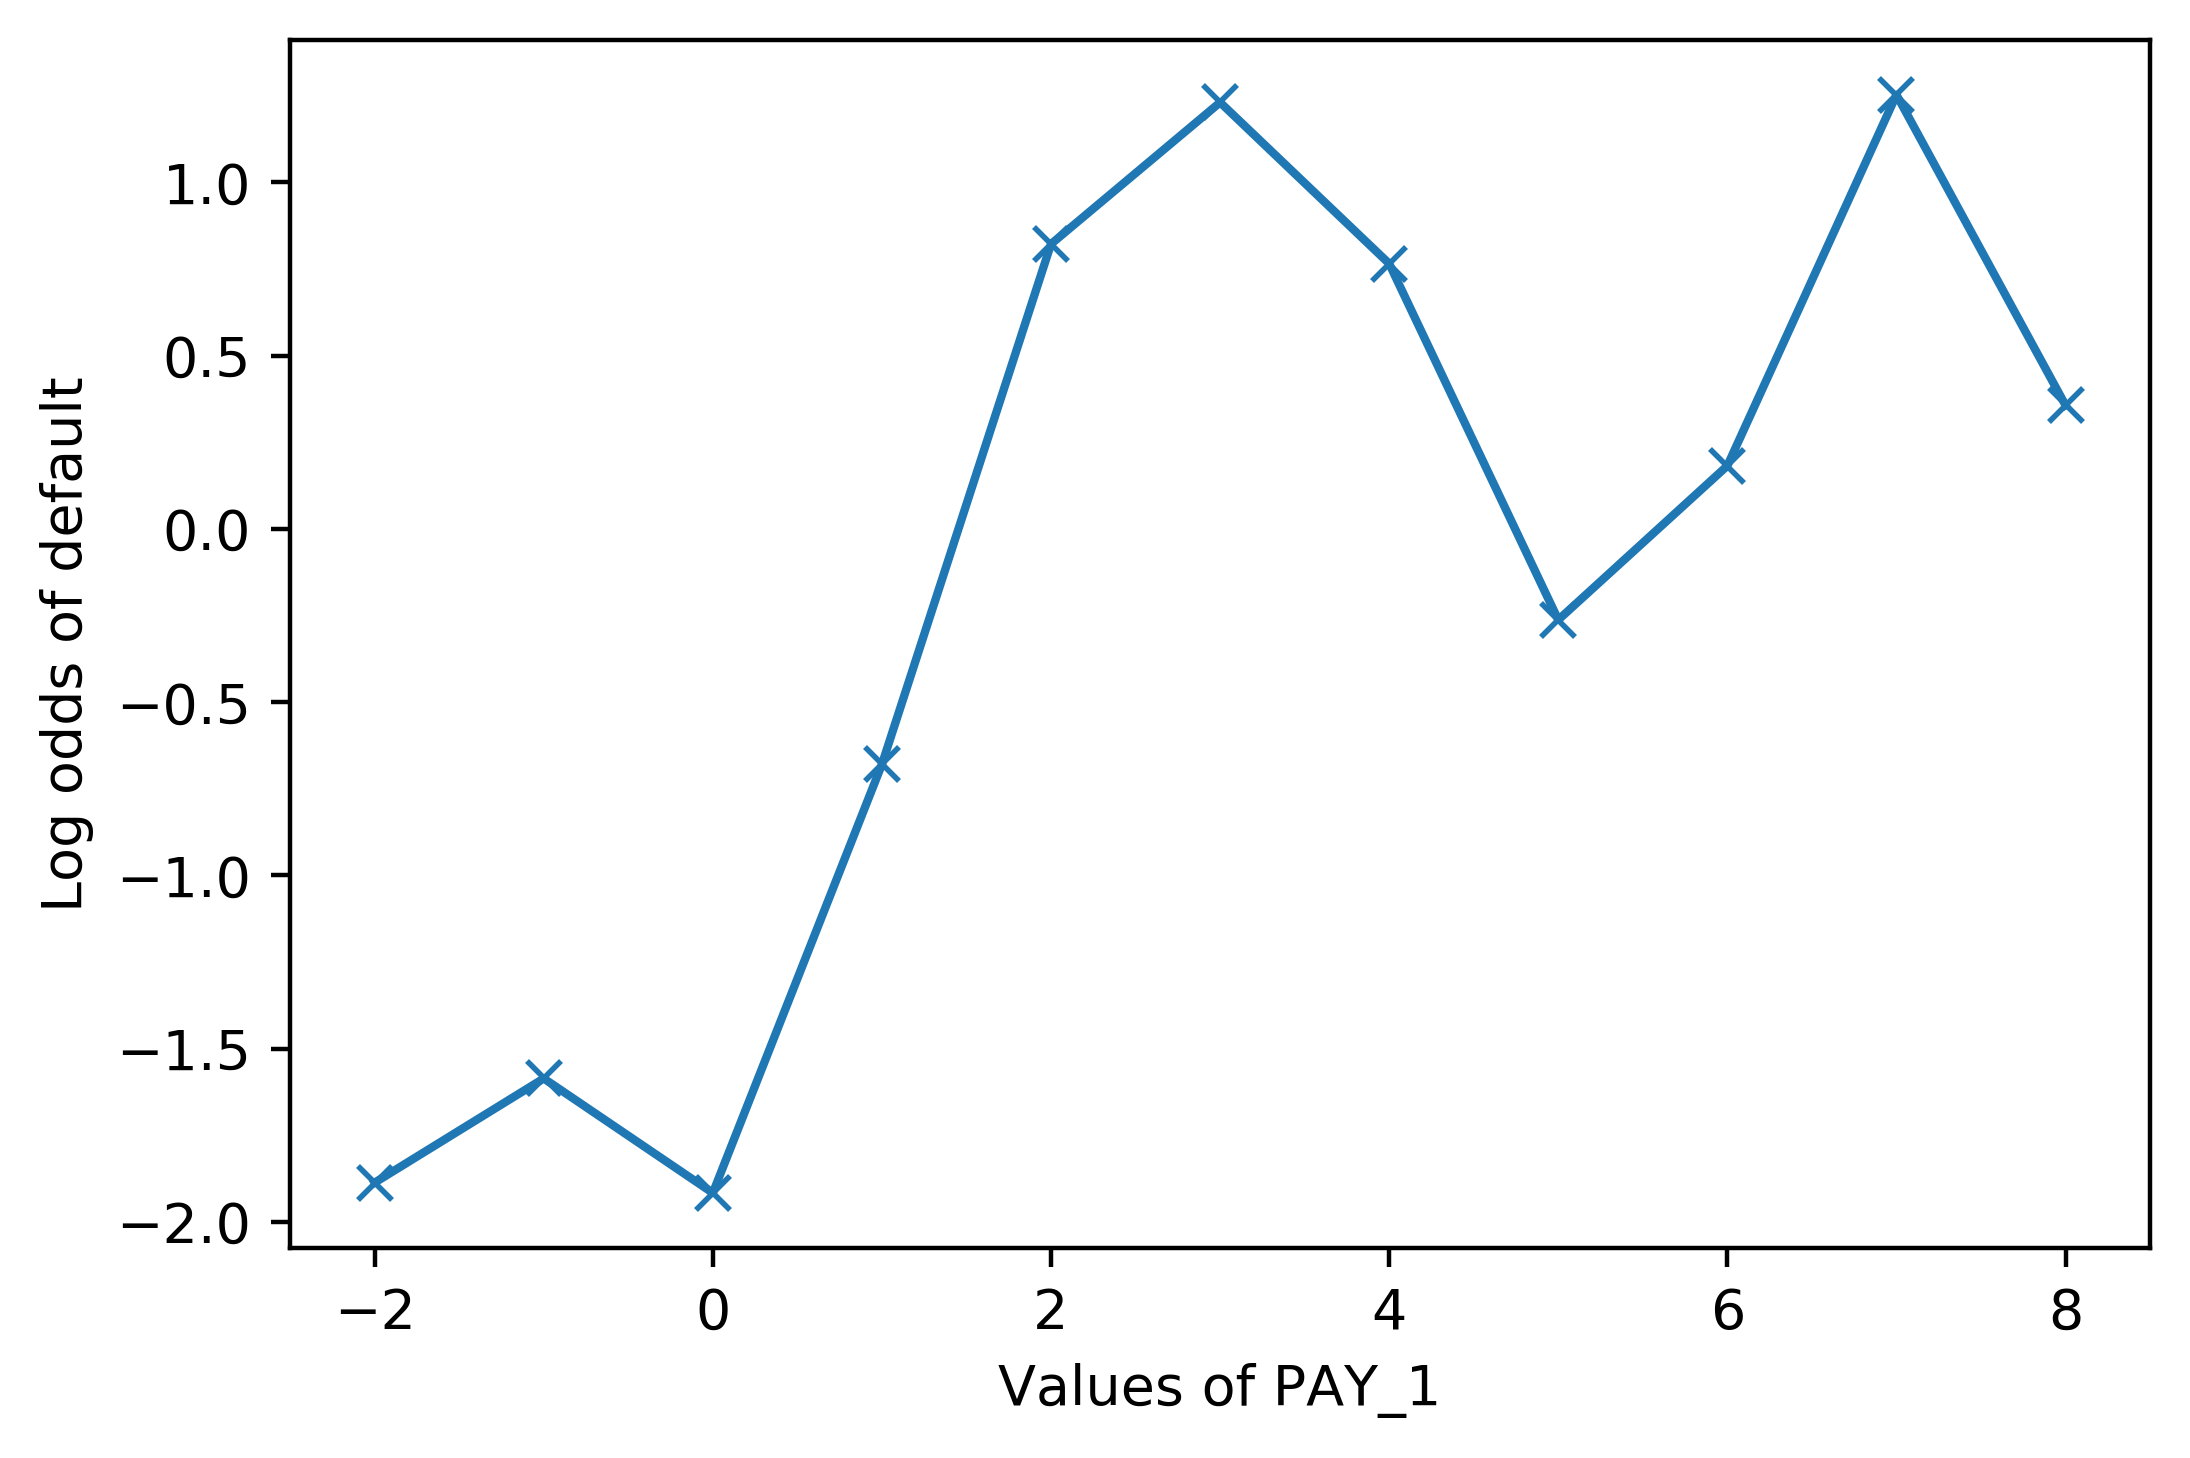

In [57]:
plt.plot(group_by_pay_mean_y.index, log_odds, '-x')
plt.ylabel('Log odds of default')
plt.xlabel('Values of PAY_1')

# From Logistic Regression Coefficients to Predictions Using the Sigmoid

Text(0, 0.5, '$p$')

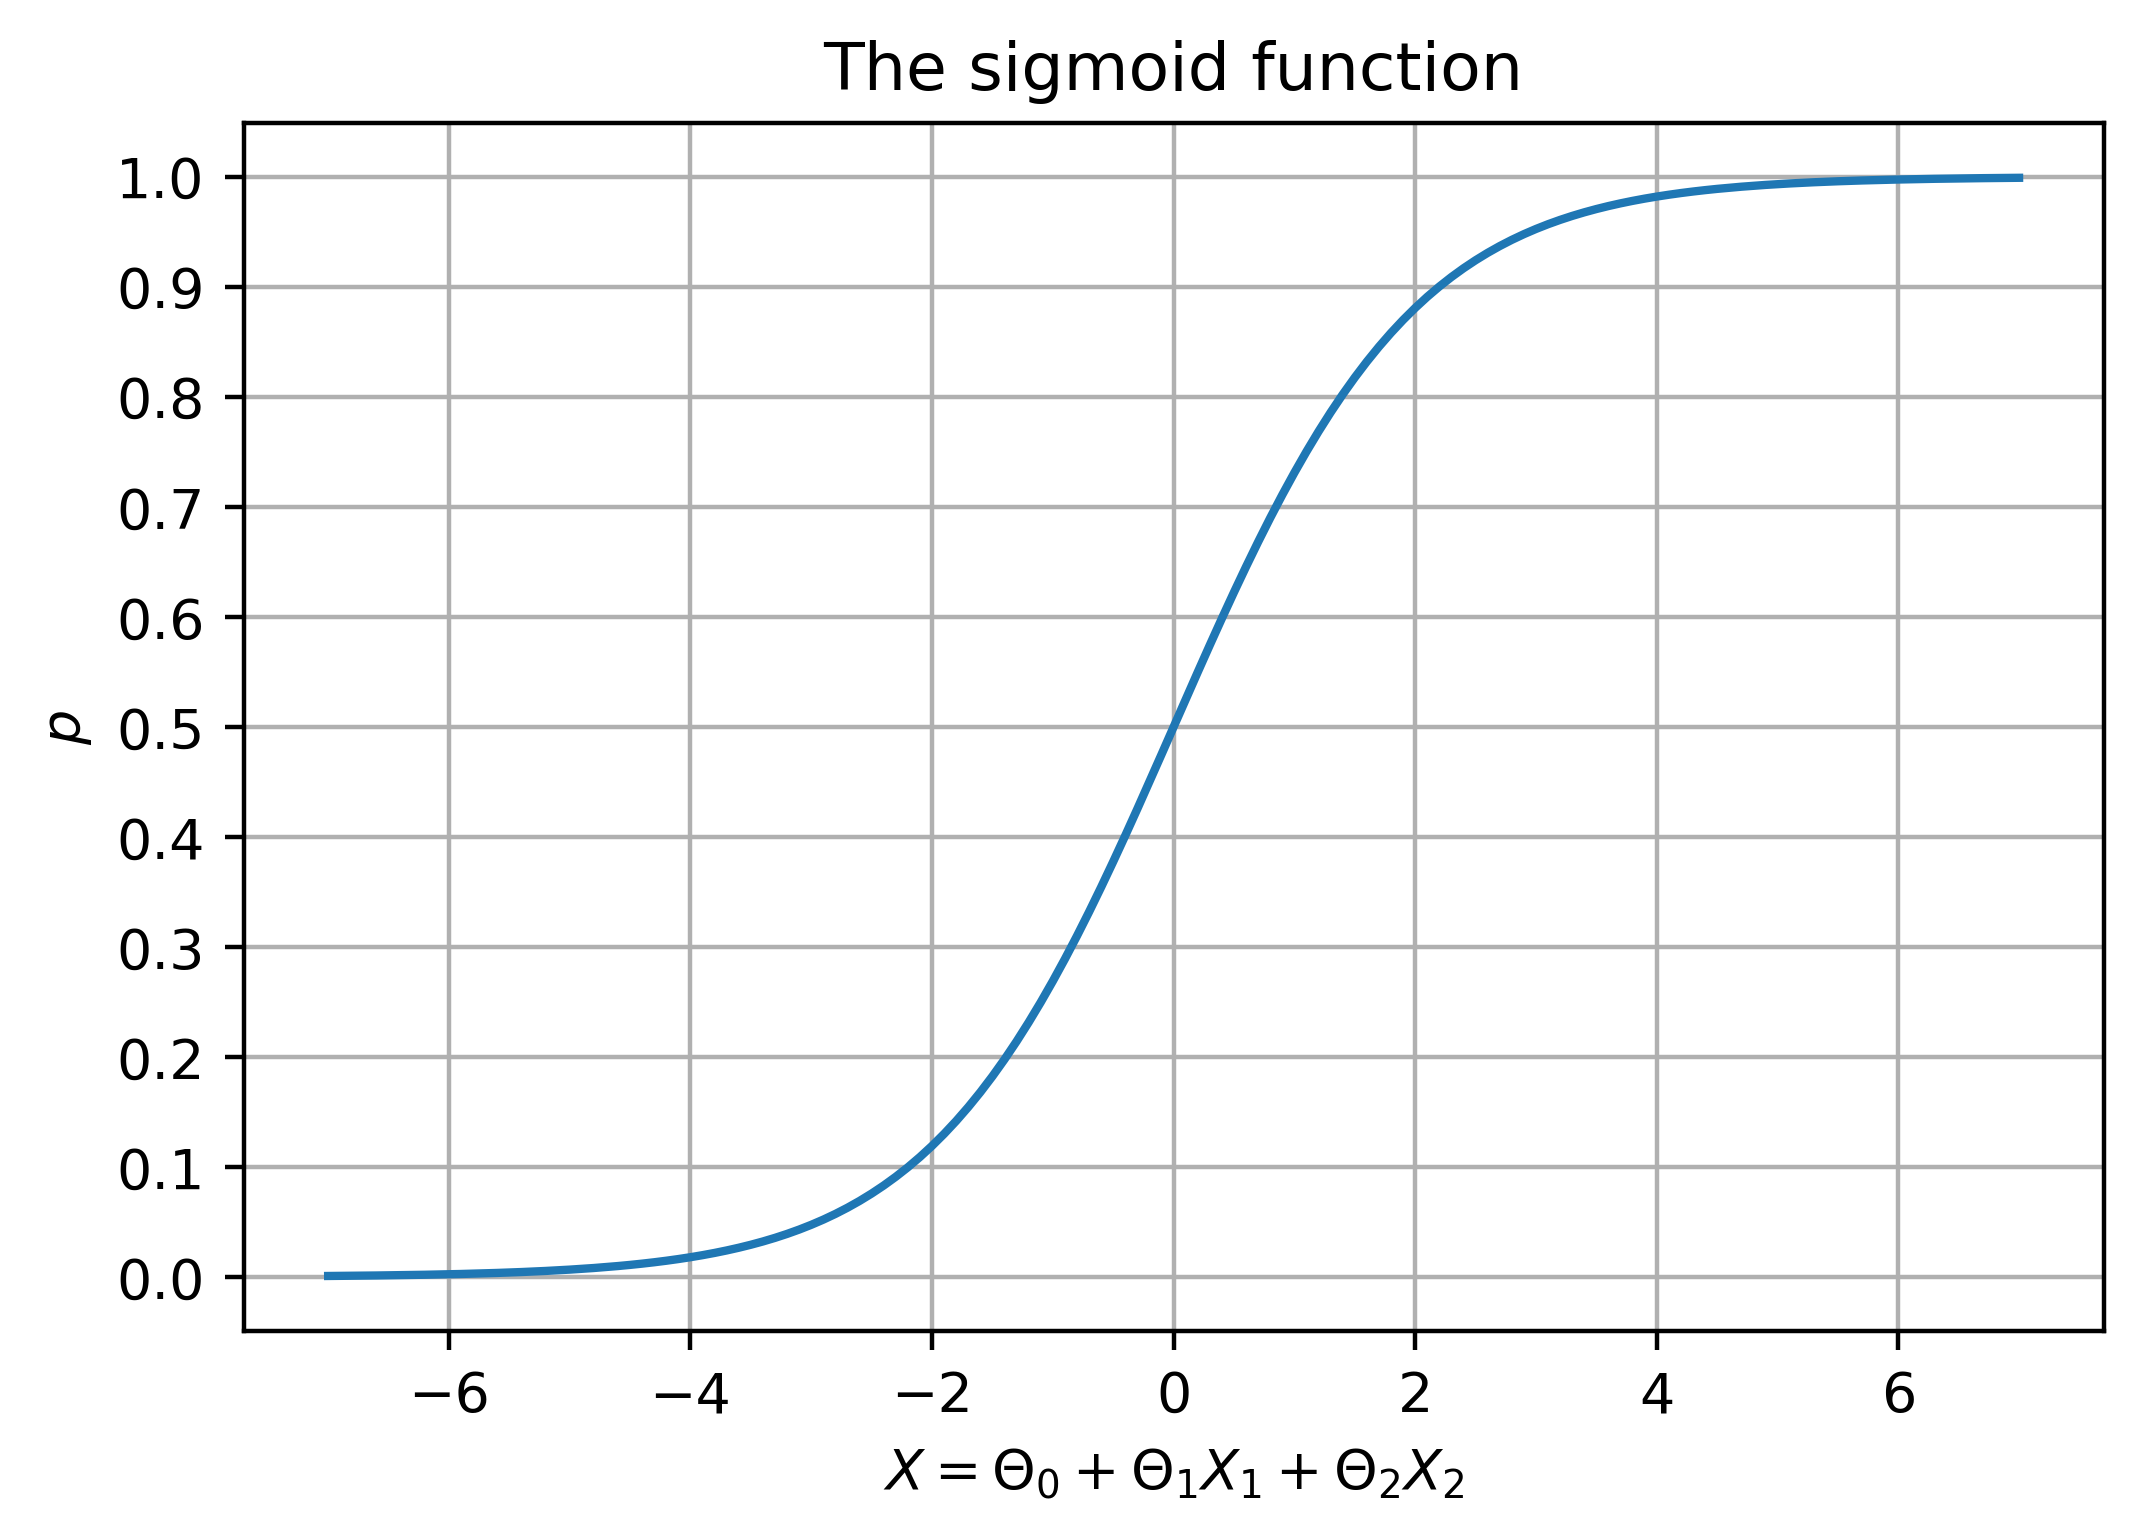

In [58]:
X_sig = np.linspace(-7,7,141)
Y_sig = sigmoid(X_sig)
plt.plot(X_sig,Y_sig)
plt.yticks(np.linspace(0,1,11))
plt.grid()
plt.title('The sigmoid function')
plt.xlabel('$X = \Theta_0 + \Theta_1 X_1 + \Theta_2 X_2$')
plt.ylabel('$p$')

# Exercise 15: Linear Decision Boundary of Logistic Regression

In [59]:
np.random.seed(seed=6)
X_1_pos = np.random.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_1_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])
X_2_pos = np.random.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_2_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])

[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]
[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]


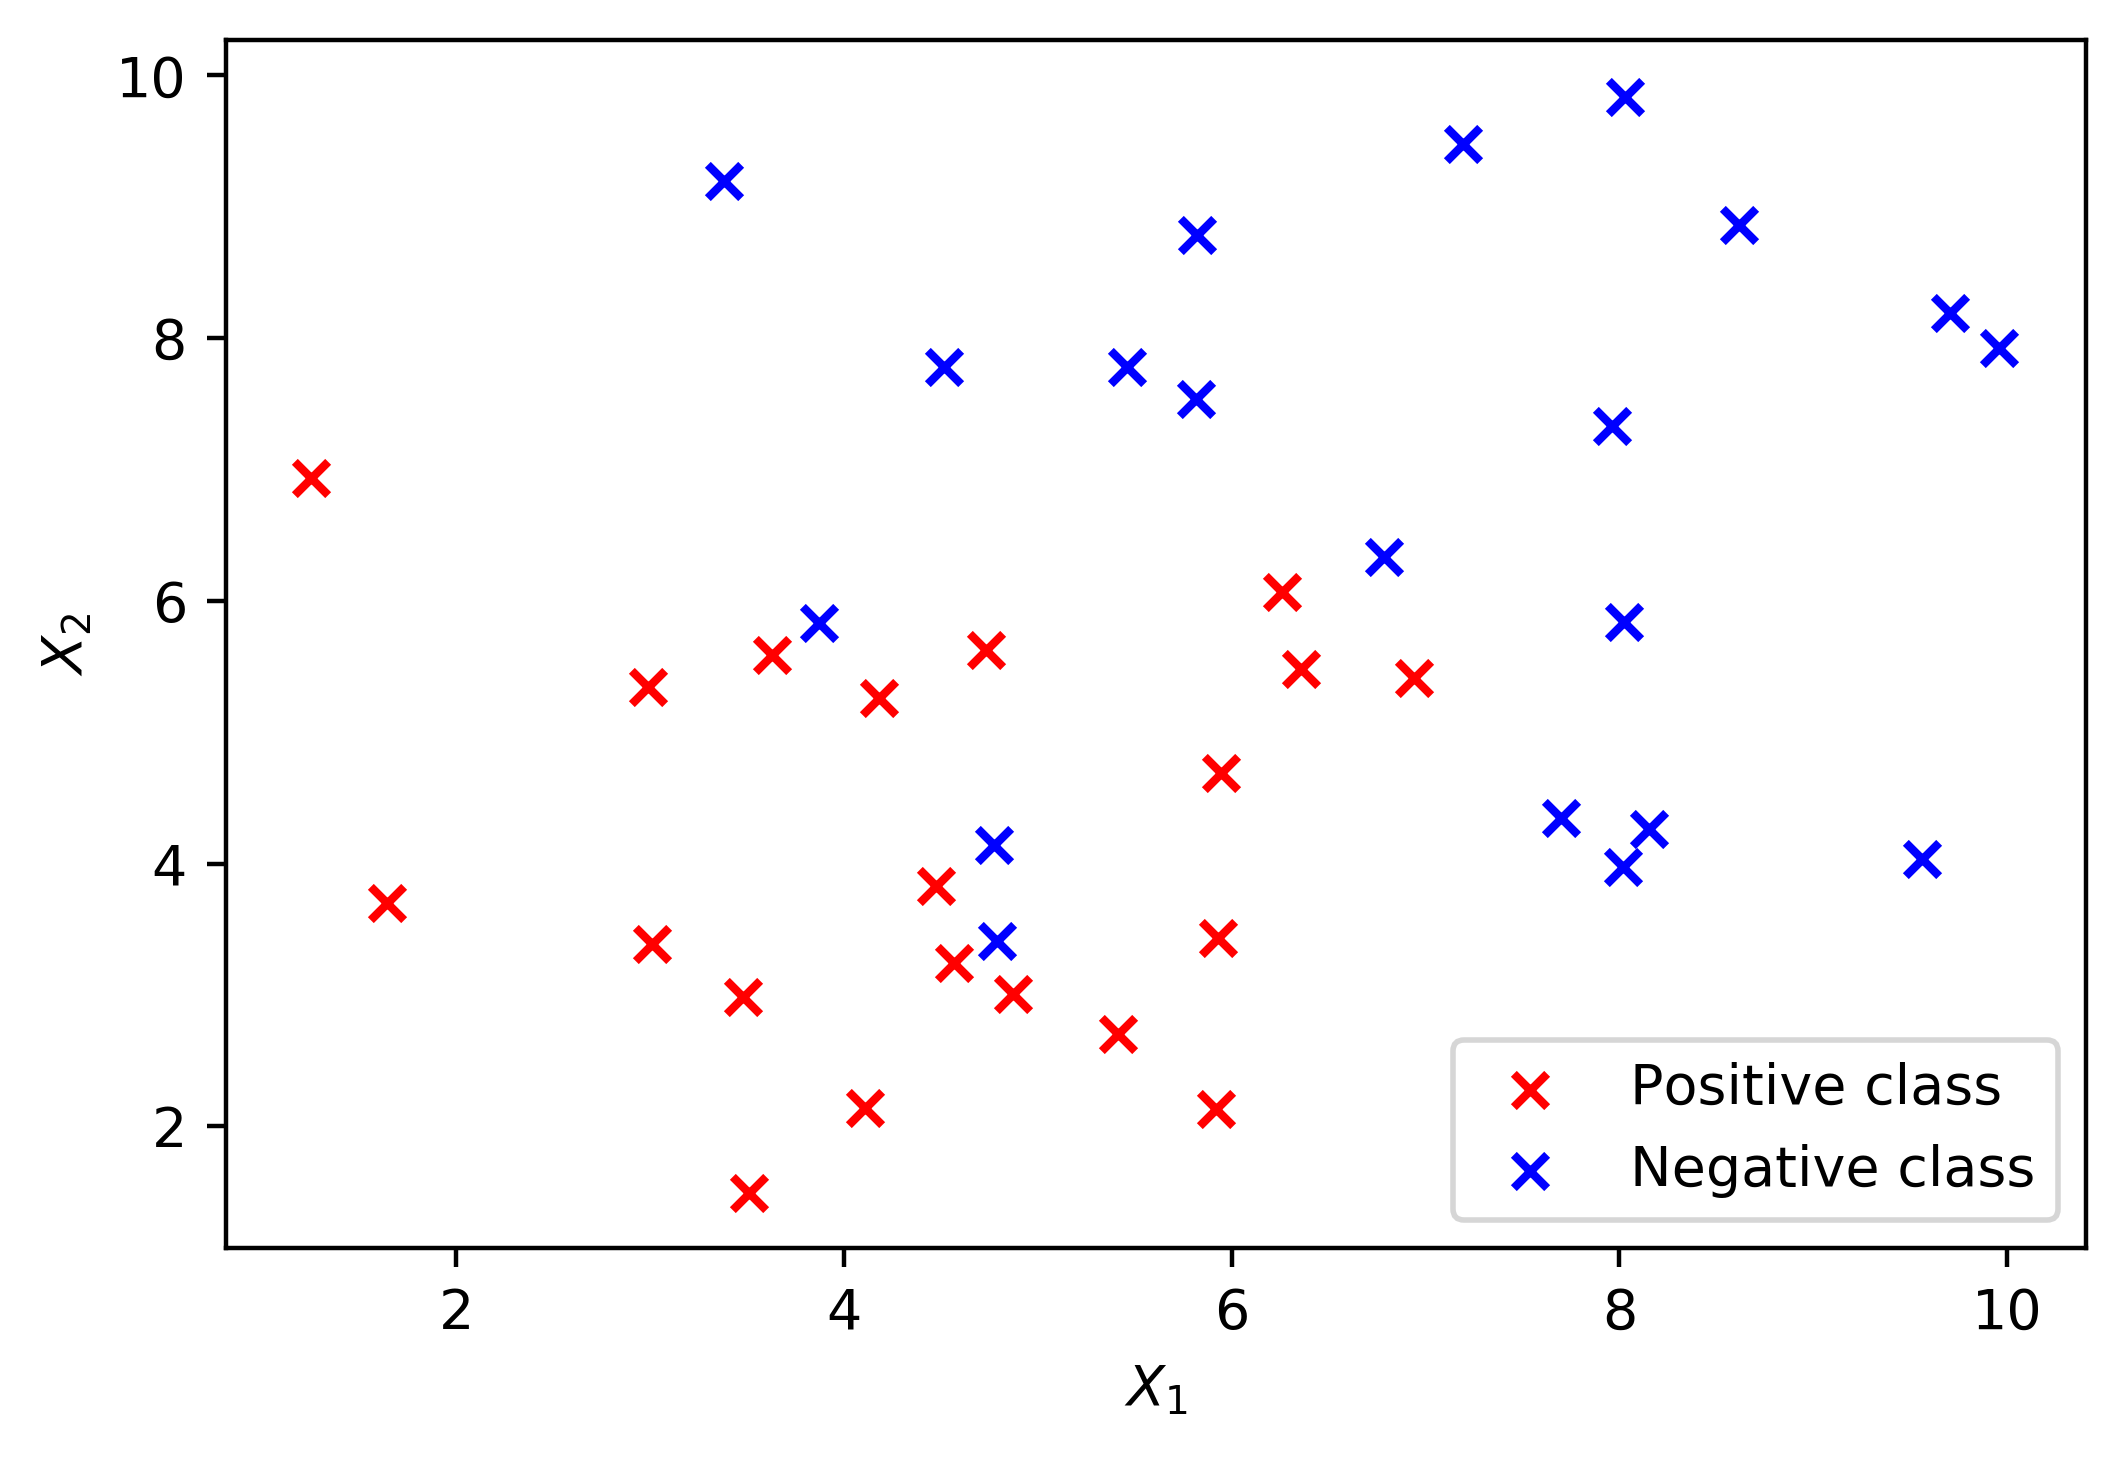

In [60]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class'])

In [61]:
X = np.block([[X_1_pos, X_2_pos], [X_1_neg, X_2_neg]])

In [62]:
print(X.shape)
print(X[0:3])

(40, 2)
[[6.35716091 5.4790643 ]
 [2.99187883 5.3444234 ]
 [5.92737474 3.43664678]]


In [63]:
y = np.vstack((np.ones((20,1)), np.zeros((20,1)))).reshape(40,)
print(y[0:5])
print(y[-5:])

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
example_lr = LogisticRegression(solver='liblinear')

In [66]:
example_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
example_lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
y_pred = example_lr.predict(X)

In [69]:
positive_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==1]
negative_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==0]

In [70]:
positive_indices

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 32, 38]

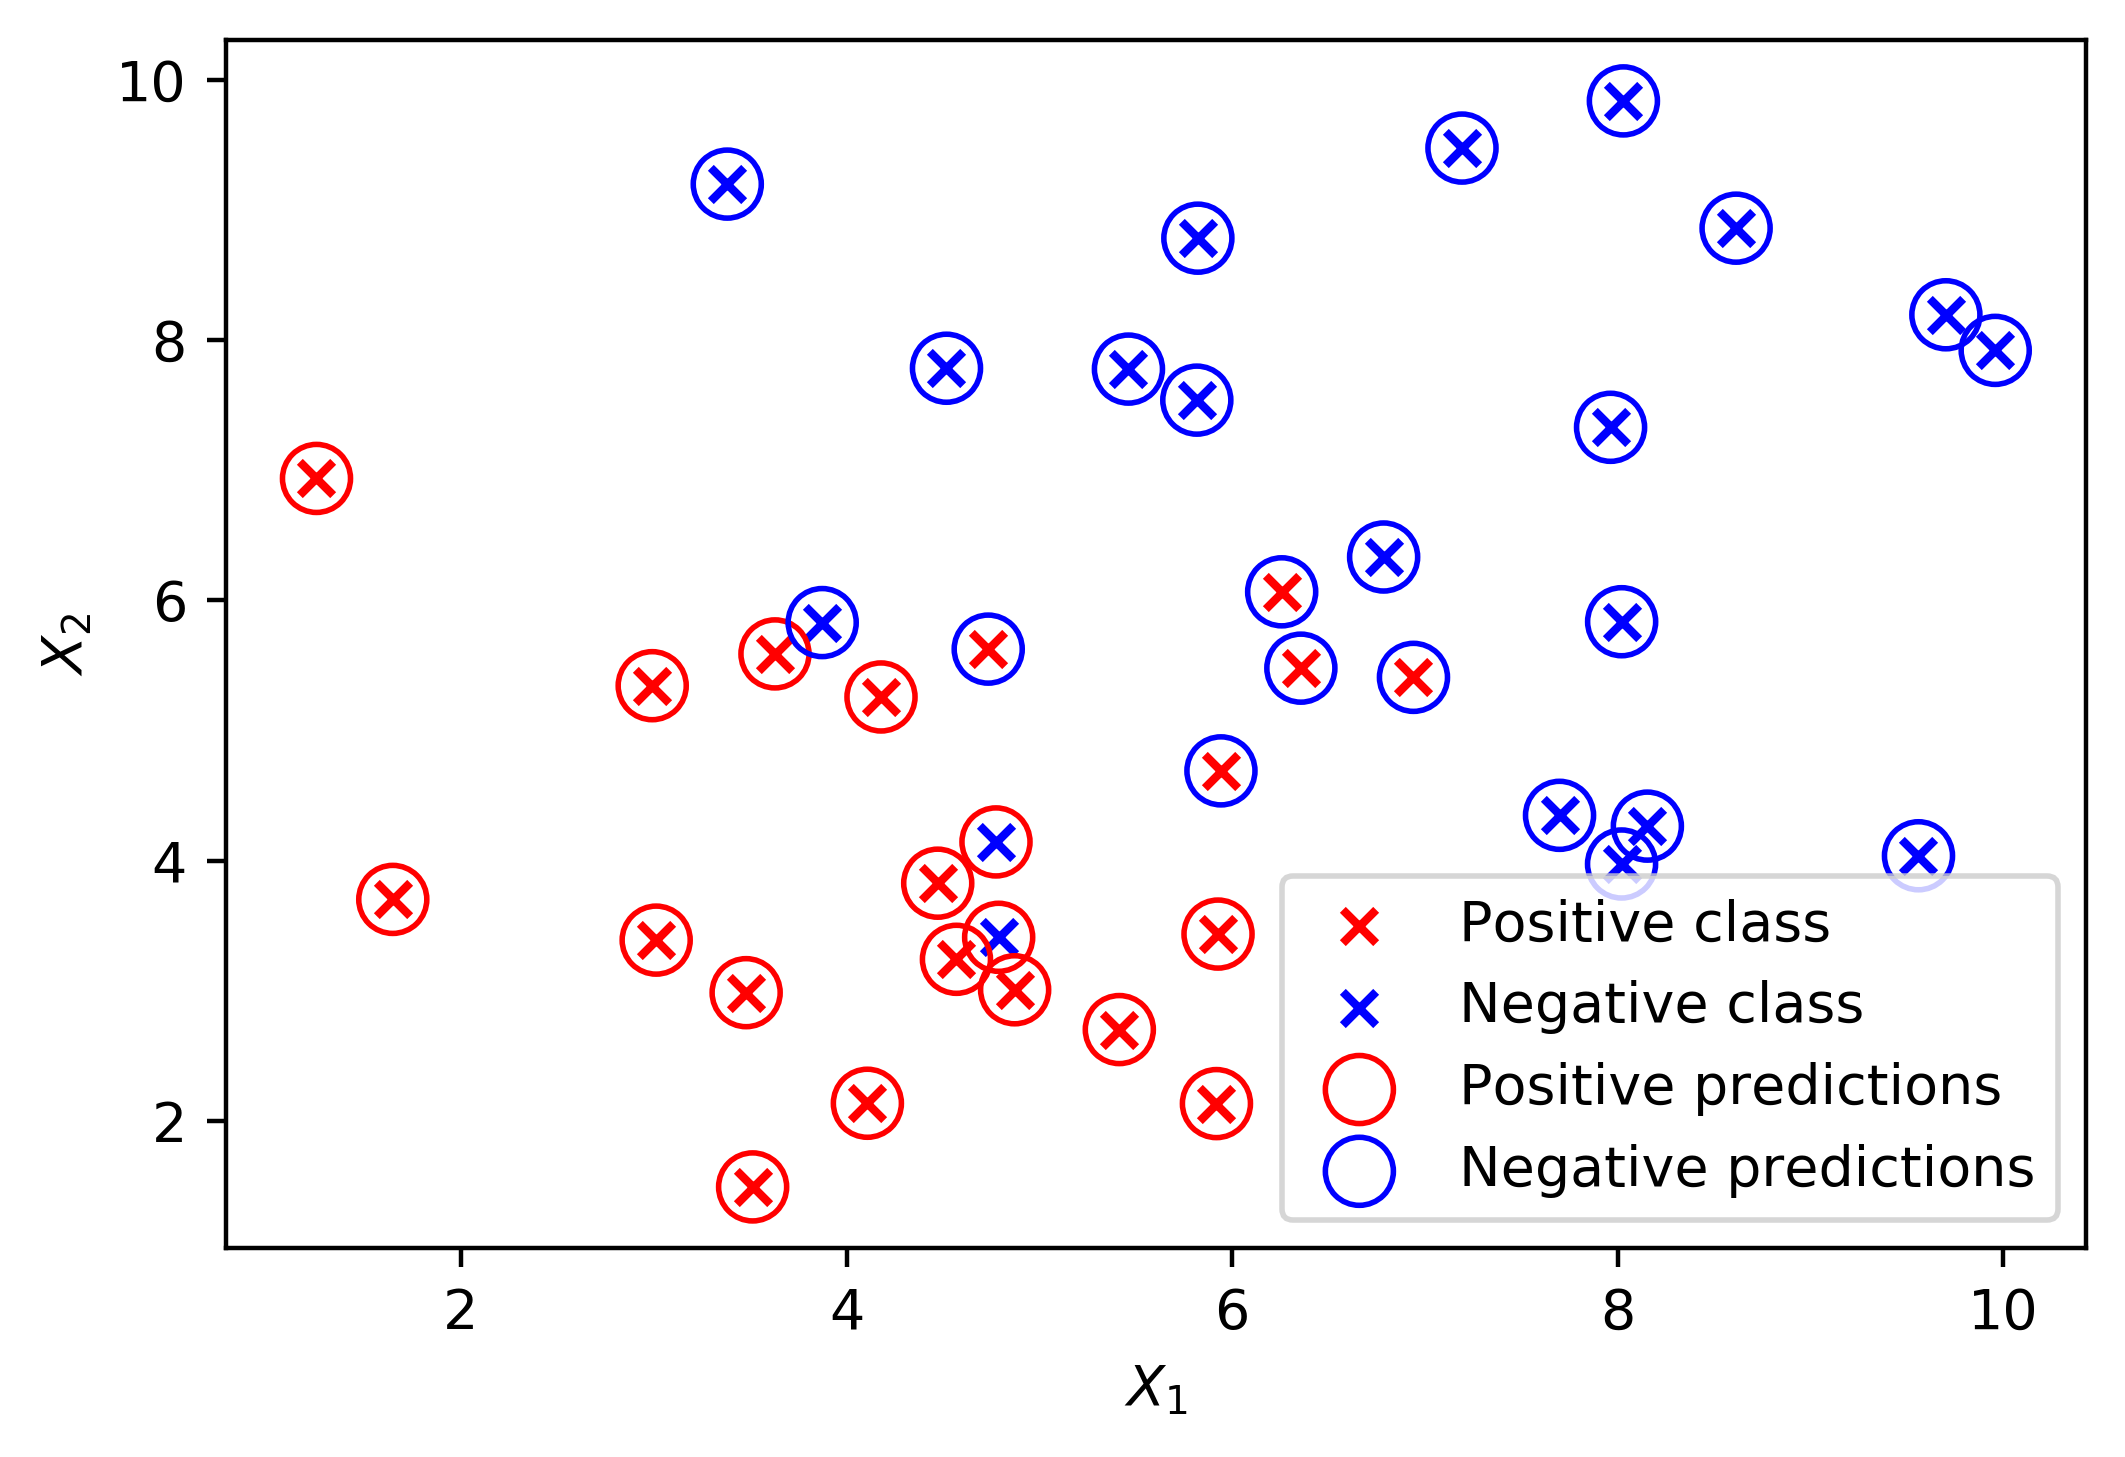

In [71]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.scatter(X[positive_indices,0], X[positive_indices,1], s=150, marker='o',
            edgecolors='red', facecolors='none')
plt.scatter(X[negative_indices,0], X[negative_indices,1], s=150, marker='o',
            edgecolors='blue', facecolors='none')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class', 'Positive predictions', 'Negative predictions'])

$\theta_0 + \theta_1 X_1 + \theta_2 X_2 = 0$ is the equation for the decision boundary line, for a threshold of 0.5. Solving for "$y = mx + b$" form,

$X_2 = -\frac{\theta_1}{\theta_2}X_1 - \frac{\theta_0}{\theta_2}$

In [72]:
theta_1 = example_lr.coef_[0][0]
theta_2 = example_lr.coef_[0][1]
print(theta_1, theta_2)

-0.20245058016285858 -0.253364236267732


In [73]:
example_lr.intercept_

array([2.25479161])

In [74]:
theta_0 = example_lr.intercept_

In [75]:
X_1_decision_boundary = np.array([0, 10])

In [76]:
X_2_decision_boundary = -(theta_1/theta_2)*X_1_decision_boundary - (theta_0/theta_2)

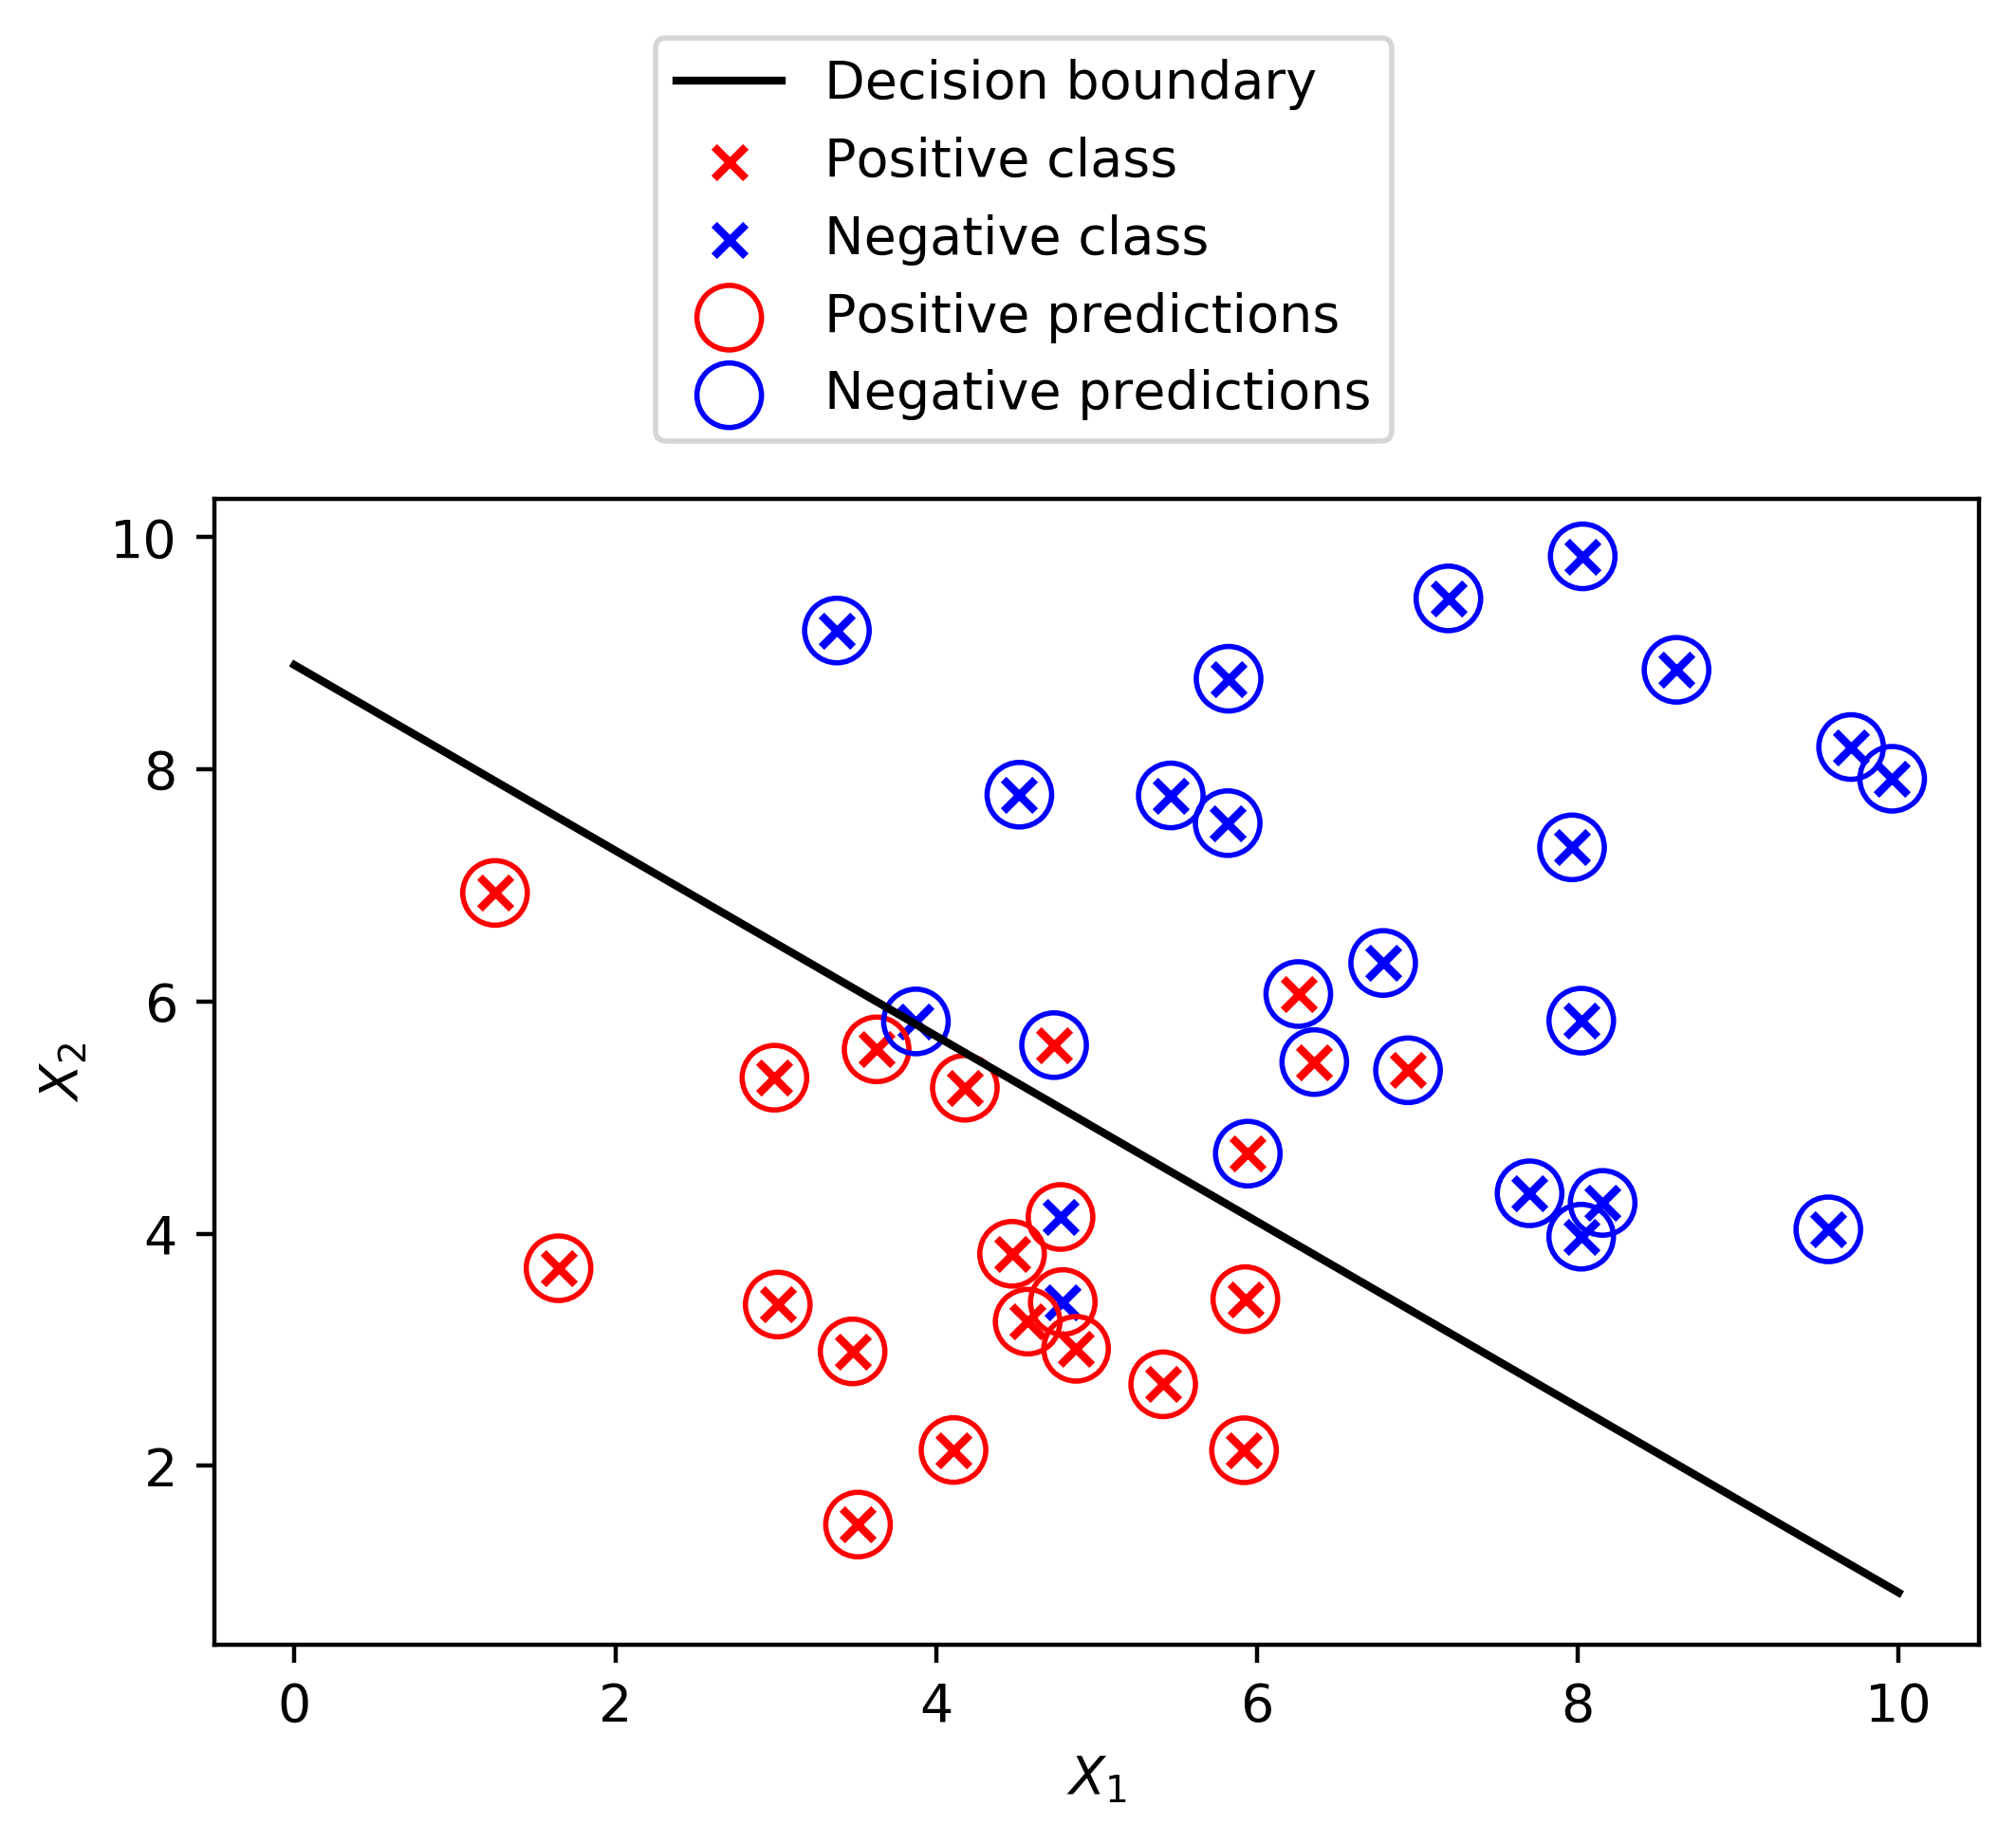

In [77]:
pos_true = plt.scatter(X_1_pos, X_2_pos, color='red', marker='x', label='Positive class')
neg_true = plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x', label='Negative class')
pos_pred = plt.scatter(X[positive_indices,0], X[positive_indices,1], s=150, marker='o',
            edgecolors='red', facecolors='none', label='Positive predictions')
neg_pred = plt.scatter(X[negative_indices,0], X[negative_indices,1], s=150, marker='o',
            edgecolors='blue', facecolors='none', label='Negative predictions')
dec = plt.plot(X_1_decision_boundary, X_2_decision_boundary, 'k-', label='Decision boundary')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(loc=[0.25, 1.05])

# Activity 3: Fitting a Logistic Regression Model and Directly Using the Coefficients

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
df[['PAY_1', 'LIMIT_BAL']].values, df['default payment next month'].values,
test_size=0.2, random_state=24)

In [80]:
print(X_train.shape)
print(X_test.shape)

(21331, 2)
(5333, 2)


In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
lr_model = LogisticRegression(solver='liblinear')

In [83]:
lr_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
y_pred = lr_model.predict(X_test)

In [86]:
y_pred_proba = lr_model.predict_proba(X_test)

In [87]:
print(lr_model.coef_, lr_model.intercept_)

[[ 8.27451187e-11 -6.80876727e-06]] [-6.57647457e-11]


In [88]:
np.ones((X_test.shape[0],1)).shape

(5333, 1)

In [89]:
ones_and_features = np.hstack([np.ones((X_test.shape[0],1)), X_test])
ones_and_features

array([[ 1.0e+00,  2.0e+00,  1.6e+05],
       [ 1.0e+00,  1.0e+00,  5.0e+04],
       [ 1.0e+00, -1.0e+00,  2.0e+05],
       ...,
       [ 1.0e+00, -1.0e+00,  5.0e+04],
       [ 1.0e+00,  1.0e+00,  2.3e+05],
       [ 1.0e+00,  2.0e+00,  1.0e+05]])

In [90]:
intercept_and_coefs = np.concatenate([lr_model.intercept_.reshape(1,1), lr_model.coef_], axis=1)
intercept_and_coefs

array([[-6.57647457e-11,  8.27451187e-11, -6.80876727e-06]])

In [91]:
X_lin_comb = np.dot(intercept_and_coefs, np.transpose(ones_and_features))

In [92]:
y_pred_proba_manual = sigmoid(X_lin_comb)

In [93]:
y_pred_manual = y_pred_proba_manual >= 0.5

In [94]:
y_pred.shape

(5333,)

In [95]:
y_pred_manual.shape

(1, 5333)

In [96]:
np.array_equal(y_pred.reshape(1,-1), y_pred_manual)

True

In [97]:
from sklearn.metrics import roc_auc_score

In [98]:
y_test.shape

(5333,)

In [99]:
y_pred_proba_manual.shape

(1, 5333)

In [100]:
roc_auc_score(y_test, y_pred_proba_manual.reshape(y_pred_proba_manual.shape[1],))

0.627207450280691

In [101]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.627207450280691